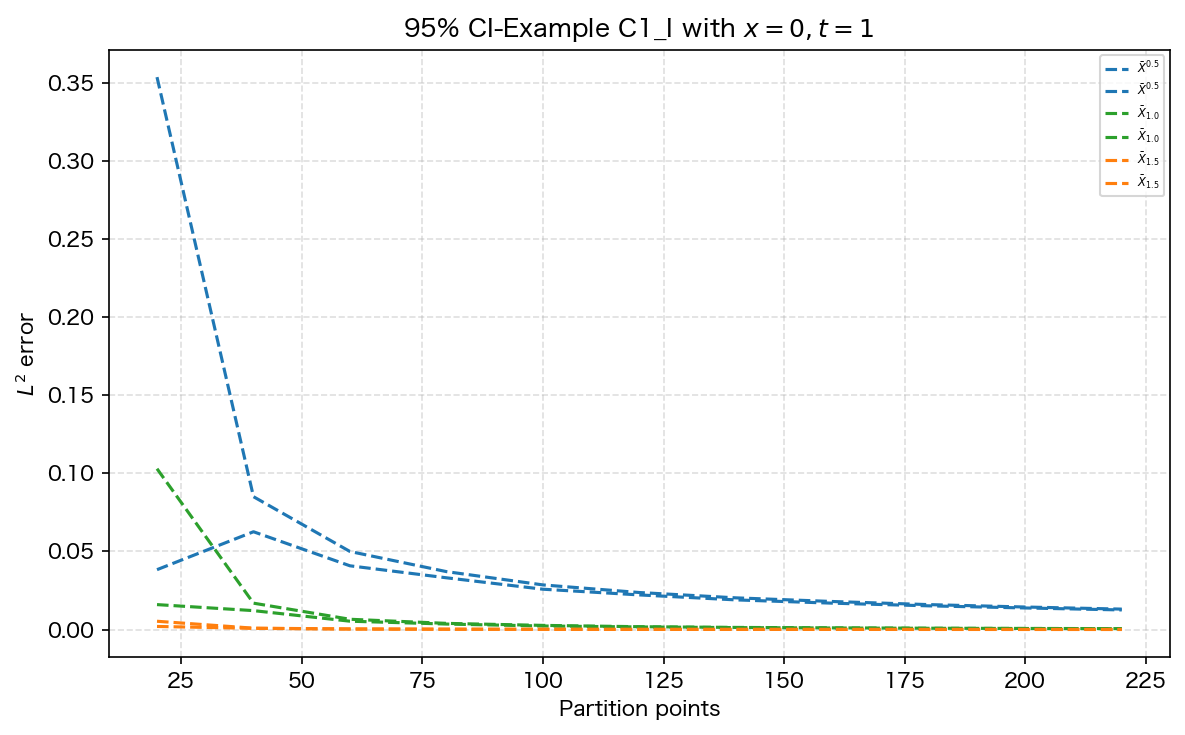

In [ ]:
#C1_I_CI with \bar{X}(x,t,w_t)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df = pd.read_csv("C1_I_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std=np.sqrt(df['E']) #Aの標本標準偏差(SD)
Am_std=np.sqrt(df['Em']) #Amの標本標準偏差(SD)
A15_std=np.sqrt(df['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 40 * (df['points'] ** 2)
# Standard errors of sample means
A_se     = A_std   / np.sqrt(paths)
Am_se    = Am_std  / np.sqrt(paths)
A15_se   = A15_std / np.sqrt(paths)

# Confidence bands
A_up_df     = df['A']     + z * A_se
A_low_df    = df['A']     - z * A_se
Am_up_df    = df['Am']    + z * Am_se
Am_low_df  = df['Am']    - z * Am_se
A15_up_df   = df['A_1_5'] + z * A15_se
A15_low_df  = df['A_1_5'] - z * A15_se

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df["points"], A_up_df, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df["points"], A_low_df, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")  
plt.plot(df["points"], Am_up_df, linestyle="--", color="#2ca02c", label=r"$\bar{X}_{1.0}$")
plt.plot(df["points"], Am_low_df, linestyle="--", color="#2ca02c", label=r"$\bar{X}_{1.0}$")  
plt.plot(df["points"], A15_up_df, linestyle="--", color="#ff7f0e", label=r"$\bar{X}_{1.5}$")
plt.plot(df["points"], A15_low_df, linestyle="--", color="#ff7f0e", label=r"$\bar{X}_{1.5}$")
plt.title(r'95% CI-Example C1_I with $x=0,t=1$ ')#INTRODUCE VALUES
plt.xlabel("Partition points")
plt.ylabel("$L^2$ error")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








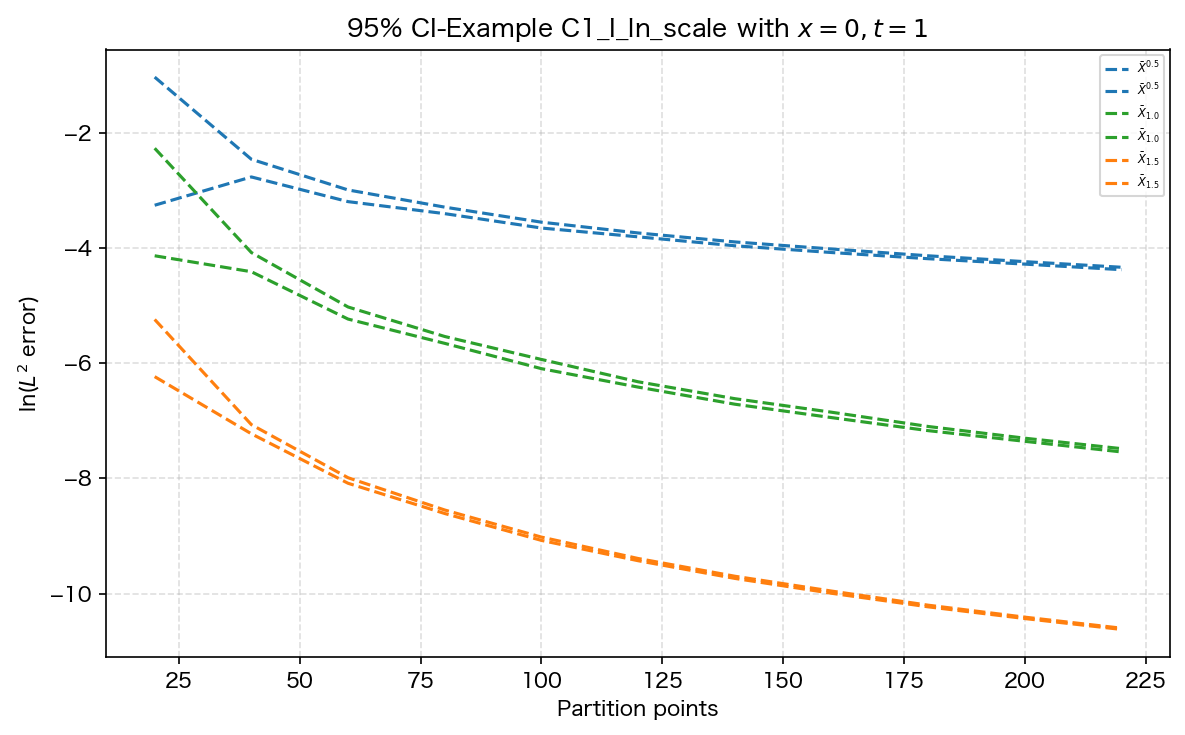

In [9]:
#C1_I_CI with \bar{X}(x,t,w_t) in Log scale
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df = pd.read_csv("C1_I_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df=np.sqrt(df['E']) #Aの標本標準偏差(SD)
Am_std_df=np.sqrt(df['Em']) #Amの標本標準偏差(SD)
A15_std_df=np.sqrt(df['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 40 * (df['points'] ** 2)
# Standard errors of sample means
A_se_df    = A_std_df   / np.sqrt(paths)
Am_se_df    = Am_std_df  / np.sqrt(paths)
A15_se_df   = A15_std_df / np.sqrt(paths)

# Confidence bands
A_up_df     = df['A']     + z * A_se_df
A_low_df    = df['A']     - z * A_se_df
Am_up_df    = df['Am']    + z * Am_se_df
Am_low_df   = df['Am']    - z * Am_se_df
A15_up_df   = df['A_1_5'] + z * A15_se_df
A15_low_df  = df['A_1_5'] - z * A15_se_df
#log変換
A_up_df_log = np.log(A_up_df)
A_low_df_log = np.log(A_low_df)
Am_up_df_log = np.log(Am_up_df)
Am_low_df_log = np.log(Am_low_df)
A15_up_df_log = np.log(A15_up_df)
A15_low_df_log = np.log(A15_low_df)

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df["points"], A_up_df_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df["points"], A_low_df_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")  
plt.plot(df["points"], Am_up_df_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}_{1.0}$")
plt.plot(df["points"], Am_low_df_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}_{1.0}$")  
plt.plot(df["points"], A15_up_df_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}_{1.5}$")
plt.plot(df["points"], A15_low_df_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}_{1.5}$")
plt.title(r'95% CI-Example C1_I_ln_scale with $x=0,t=1$ ')
plt.xlabel("Partition points")
plt.ylabel("ln($L^2$ error)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_CI_ln.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








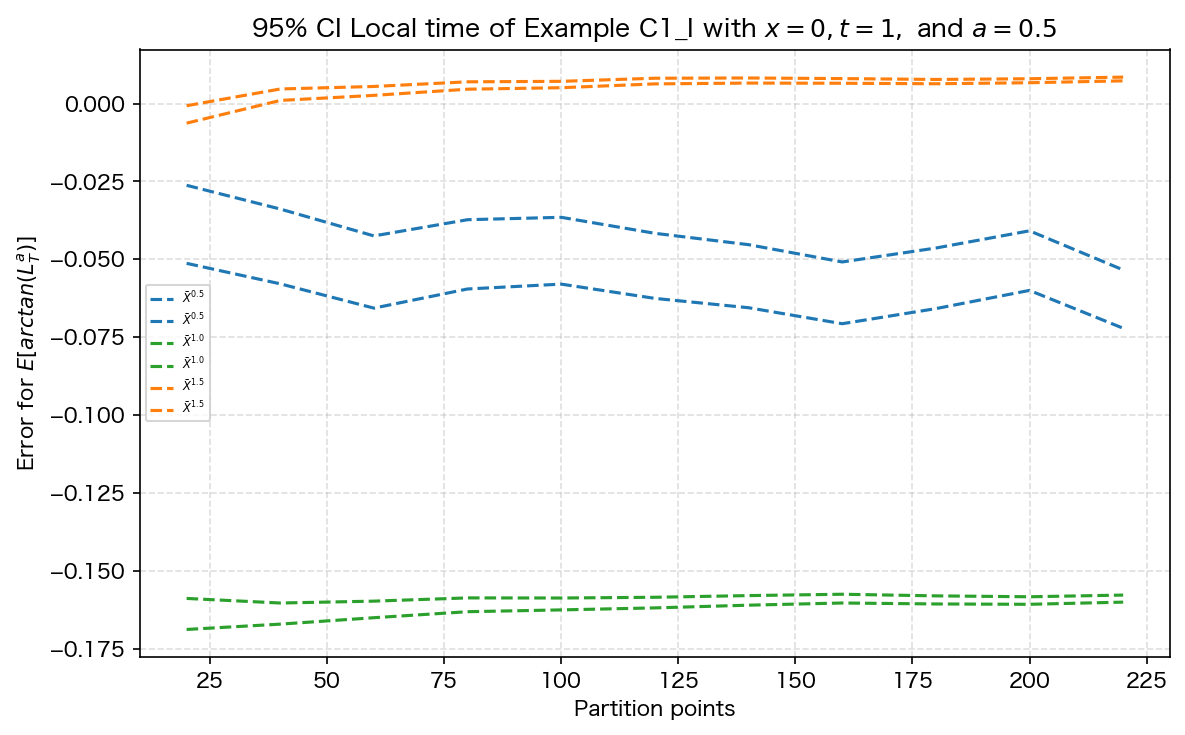

In [10]:
#C1_I_LT_CI with \bar{X}(x,t,w_t)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("C1_I_LT_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 40 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ ")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.title(r'95% CI Local time of Example C1_I with $x=0,t=1,$ and $a=0.5$ ')
plt.xlabel("Partition points")
plt.ylabel("Error for $E[arctan(L_T^a)]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_LT_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








In [58]:
#C1_I_LT_CI with \bar{X}(x,t,w_t) in Log scale
##信頼区間公式 \\bar{X} ± z * (s/√n) 
# ここで、\\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("TFTVD1_I/TFTVD1_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 40 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2

# AとAmは負の値を取るため、そのままでは対数変換できない。
# series_list = [A_up_df2, A_low_df2, Am_up_df2, Am_low_df2, A15_up_df2, A15_low_df2]
# min_val = min(series.min() for series in series_list)
# log_offset = 0 if min_val > 0 else abs(min_val) 

#log変換
A_up_df2_log  = np.log(abs(A_up_df2)  )
A_low_df2_log = np.log(abs(A_low_df2) )
Am_up_df2_log = np.log(abs(Am_up_df2) )
Am_low_df2_log = np.log(abs(Am_low_df2) )
A15_up_df2_log = np.log(abs(A15_up_df2) )
A15_low_df2_log = np.log(abs(A15_low_df2) )


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], Am_up_df2_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df2["points"], A15_up_df2_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI Local time of Example C1_I_ln_scale with $x=0,t=1$ and $a=0.5$')# introduce values   
plt.xlabel("Partition points")
plt.ylabel(r"Absolute Error for $E[arctan(L_T^a)]$ in ln scale")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_LT_CI_ln.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








FileNotFoundError: [Errno 2] No such file or directory: 'TFTVD1_I/TFTVD1_data.csv'

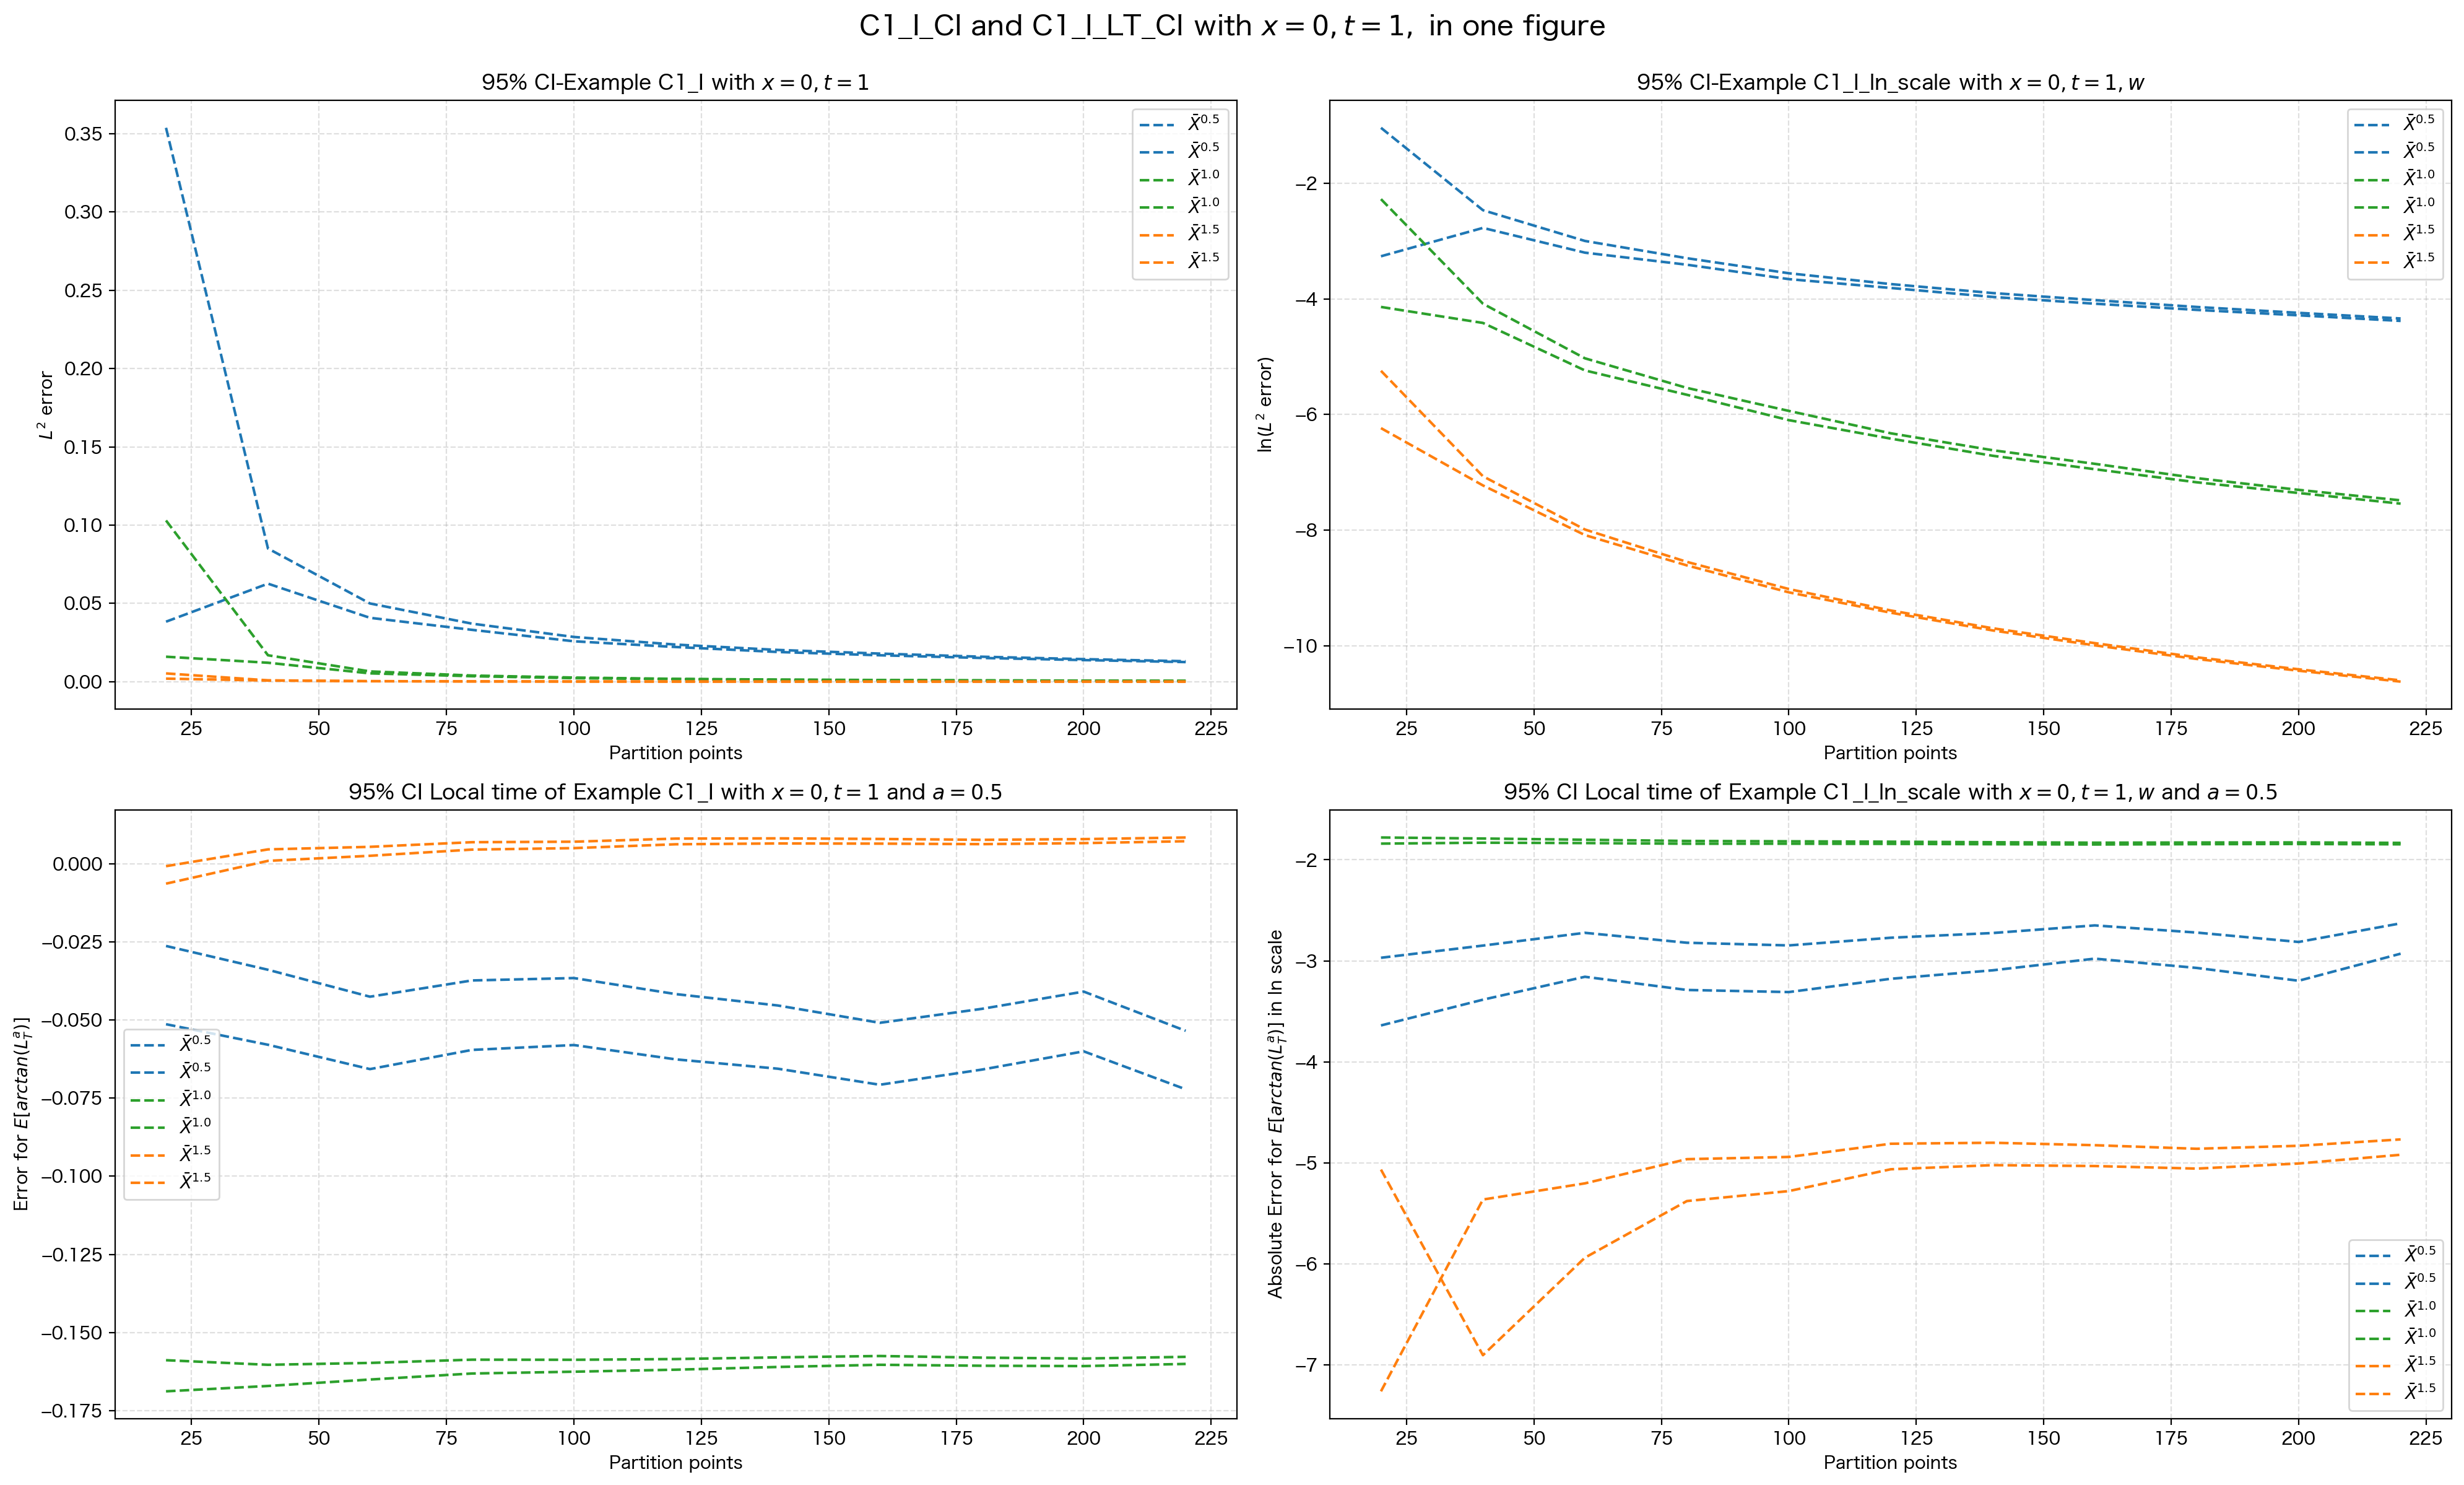

In [ ]:
#C1_I_CI, C1_I_CI_ln and C1_I_LT_CI, C1_I_LT_CI_ln with \bar{X}(x,t,w_t) in one figure
# 4つのsubplotsを作成す
fig, axes = plt.subplots(2, 2, figsize=(20, 12), dpi=200) #2row, 2columns
ax1, ax2, ax3, ax4 = axes.flatten()  # 将2D数组展平为1D数组

# 左側のsubplot：3 本の曲線を比較する
ax1.plot(df["points"], A_up_df, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df["points"], A_low_df, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ ")  
ax1.plot(df["points"], Am_up_df, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
ax1.plot(df["points"], Am_low_df, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")  
ax1.plot(df["points"], A15_up_df, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
ax1.plot(df["points"], A15_low_df, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")

# 左側subplotのラベル
ax1.set_title(r'95% CI-Example C1_I with $x=0,t=1$ ')
ax1.set_xlabel("Partition points")
ax1.set_ylabel("$L^2$ error")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend()

# 右側のsubplot：Am と A_1.5 の具体的な対比
ax2.plot(df["points"], A_up_df_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax2.plot(df["points"], A_low_df_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ ")  
ax2.plot(df["points"], Am_up_df_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
ax2.plot(df["points"], Am_low_df_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")  
ax2.plot(df["points"], A15_up_df_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
ax2.plot(df["points"], A15_low_df_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
ax2.set_title(r'95% CI-Example C1_I_ln_scale with $x=0,t=1$ ')
ax2.set_xlabel("Partition points")
ax2.set_ylabel("ln($L^2$ error)")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend()

ax3.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax3.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")  
ax3.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
ax3.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")  
ax3.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
ax3.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")

# 左側subplotのラベル
ax3.set_title(r'95% CI Local time of Example C1_I with $x=0,t=1$ and $a=0.5$ ')
ax3.set_xlabel("Partition points")
ax3.set_ylabel("Error for $E[arctan(L_T^a)]$")
ax3.grid(True, linestyle="--", alpha=0.4)
ax3.legend()

ax4.plot(df2["points"], A_up_df2_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax4.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax4.plot(df2["points"], Am_up_df2_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax4.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax4.plot(df2["points"], A15_up_df2_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax4.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")

# 左側subplotのラベル
ax4.set_title(r'95% CI Local time of Example C1_I_ln_scale with $x=0,t=1$ and $a=0.5$ ')
ax4.set_xlabel("Partition points")
ax4.set_ylabel(r"Absolute Error for $E[arctan(L_T^a)]$ in ln scale")
ax4.grid(True, linestyle="--", alpha=0.4)
ax4.legend()

# 4) 全体レイアウトを調整する
fig.suptitle(r'C1_I_CI and C1_I_LT_CI with $x=0,t=1$ in one figure', fontsize=16, y=0.995)
plt.tight_layout()
plt.savefig("C1_I_one_figure.png")# 画像として保存したい場合はコメントアウトを外す
plt.show()

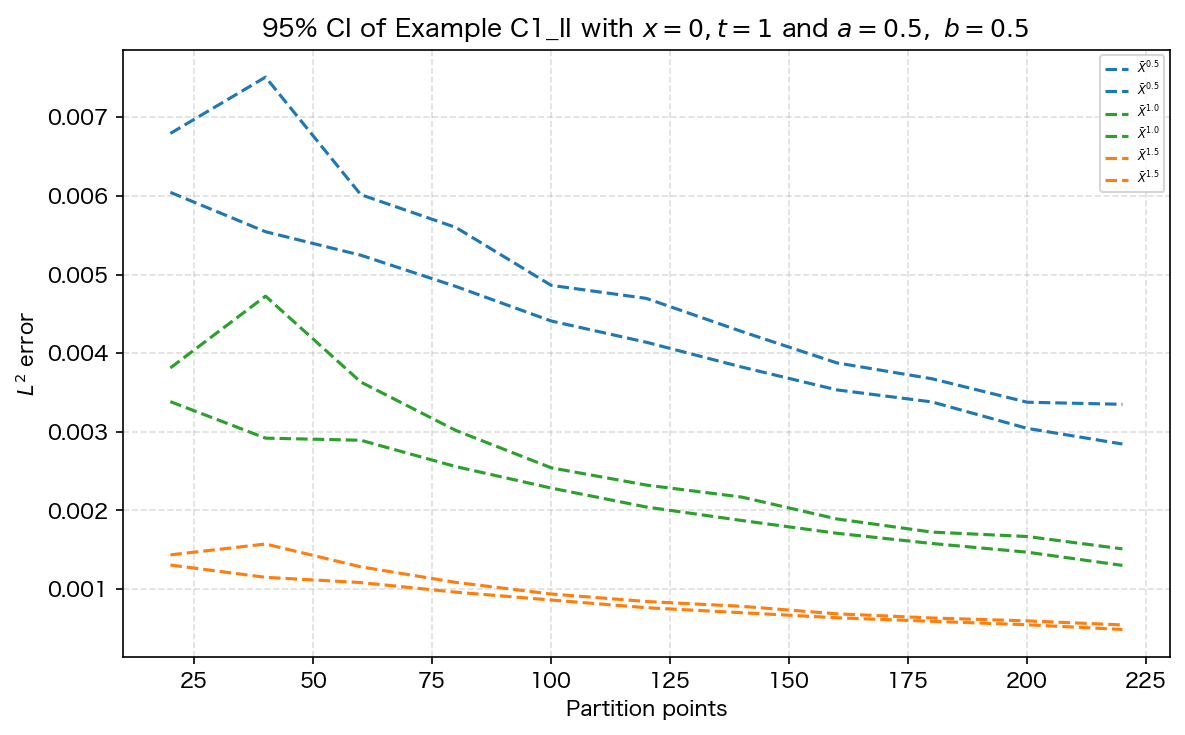

In [13]:
#C1_II_CI  with \bar{X}(x,t,w,w')
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df3 = pd.read_csv("C1_II_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df3=np.sqrt(df3['E']) #Aの標本標準偏差(SD)
Am_std_df3=np.sqrt(df3['Em']) #Amの標本標準偏差(SD)
A15_std_df3=np.sqrt(df3['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = df3['points'] ** 2
# Standard errors of sample means
A_se_df3     = A_std_df3  / np.sqrt(paths)
Am_se_df3    = Am_std_df3  / np.sqrt(paths)
A15_se_df3  = A15_std_df3 / np.sqrt(paths)

# Confidence bands
A_up_df3     = df3['A']     + z * A_se_df3
A_low_df3    = df3['A']     - z * A_se_df3
Am_up_df3    = df3['Am']    + z * Am_se_df3
Am_low_df3  = df3['Am']    - z * Am_se_df3
A15_up_df3   = df3['A_1_5'] + z * A15_se_df3
A15_low_df3  = df3['A_1_5'] - z * A15_se_df3

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df["points"], A_up_df3, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df["points"], A_low_df3, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df["points"], Am_up_df3, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df["points"], Am_low_df3, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df["points"], A15_up_df3, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df["points"], A15_low_df3, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C1_II with $x=0,t=1$ and $a=0.5,\ b=0.5$ ')
plt.xlabel("Partition points")
plt.ylabel("$L^2$ error")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_II_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








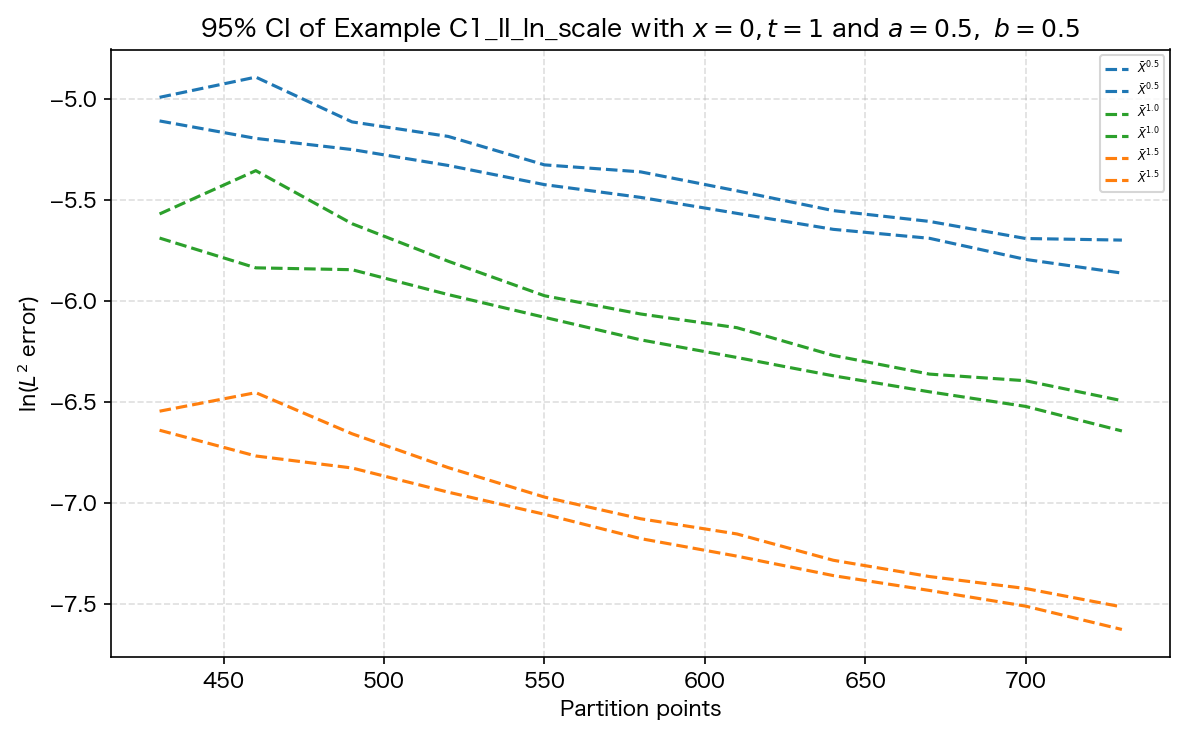

In [14]:
#C1_II_CI  with \bar{X}(x,t,w,w') in Log scale
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df4 = pd.read_csv("C1_II_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df4=np.sqrt(df4['E']) #Aの標本標準偏差(SD)
Am_std_df4=np.sqrt(df4['Em']) #Amの標本標準偏差(SD)
A15_std_df4=np.sqrt(df4['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = df4['points'] ** 2
# Standard errors of sample means
A_se_df4    = A_std_df4   / np.sqrt(paths)
Am_se_df4    = Am_std_df4  / np.sqrt(paths)
A15_se_df4   = A15_std_df4 / np.sqrt(paths)

# Confidence bands
A_up_df4     = df4['A']     + z * A_se_df4
A_low_df4   = df4['A']     - z * A_se_df4
Am_up_df4    = df4['Am']    + z * Am_se_df4
Am_low_df4   = df4['Am']    - z * Am_se_df4
A15_up_df4   = df4['A_1_5'] + z * A15_se_df4
A15_low_df4  = df4['A_1_5'] - z * A15_se_df4
#log変換
A_up_df4_log = np.log(A_up_df4)
A_low_df4_log = np.log(A_low_df4)
Am_up_df4_log = np.log(Am_up_df4)
Am_low_df4_log = np.log(Am_low_df4)
A15_up_df4_log = np.log(A15_up_df4)
A15_low_df4_log = np.log(A15_low_df4)

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df4["points"], A_up_df4_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df4["points"], A_low_df4_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df4["points"], Am_up_df4_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df4["points"], Am_low_df4_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df4["points"], A15_up_df4_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df4["points"], A15_low_df4_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C1_II_ln_scale with $x=0,t=1$ and $a=0.5,\ b=0.5$ ')
plt.xlabel("Partition points")
plt.ylabel("ln($L^2$ error)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_II_CI_ln.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








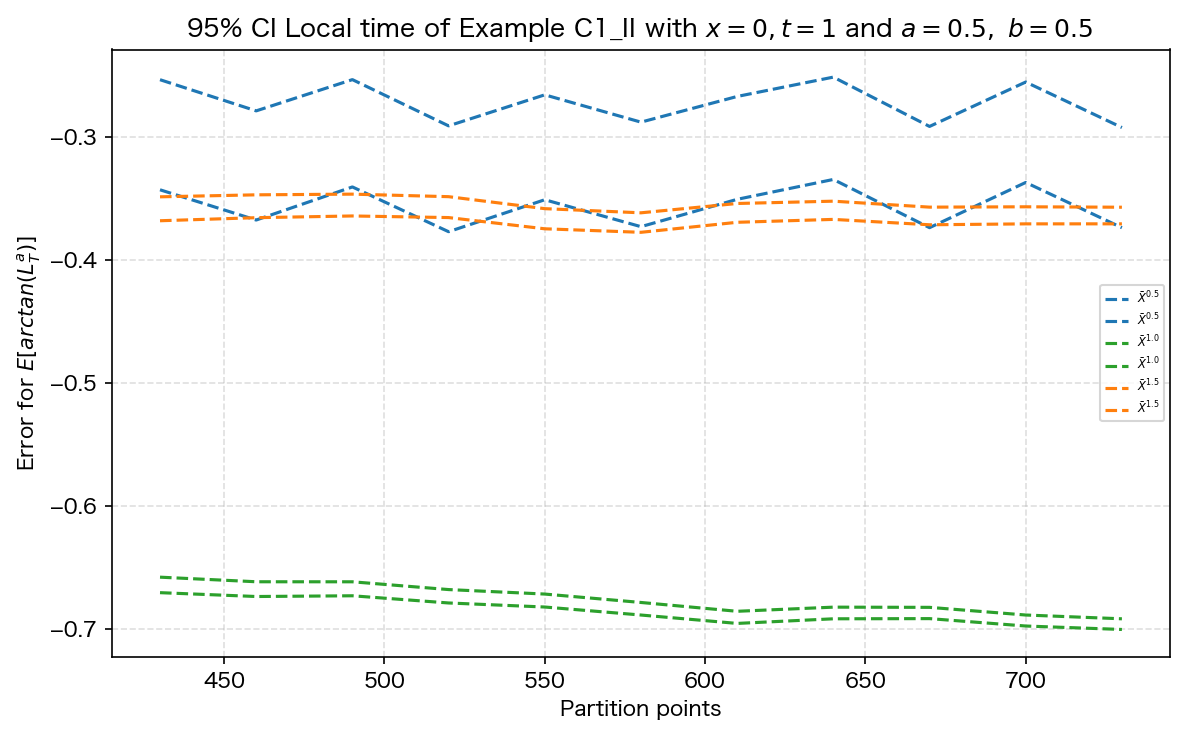

In [15]:
#C1_II_LT_CI with \bar{X}(x,t,w,w')
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_II_LT_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = df5['points'] ** 2
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI Local time of Example C1_II with $x=0,t=1$ and $a=0.5,\ b=0.5$ ')
plt.xlabel("Partition points")
plt.ylabel("Error for $E[arctan(L_T^a)]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_II_LT_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








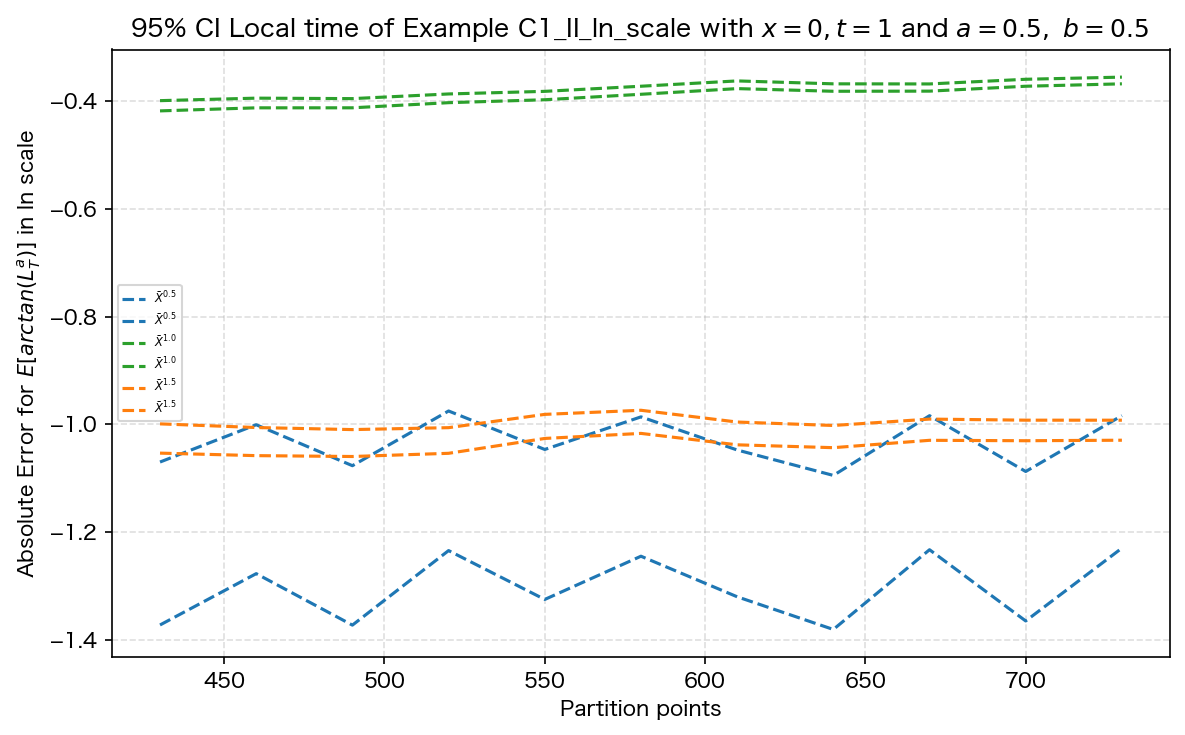

In [16]:
#C1_II_LT_CI with \bar{X}(x,t,w,w') in Log scale
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_II_LT_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = df5['points'] ** 2
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5



#log変換
A_up_df5_log  = np.log(abs(A_up_df5))
A_low_df5_log = np.log(abs(A_low_df5))
Am_up_df5_log = np.log(abs(Am_up_df5))
Am_low_df5_log = np.log(abs(Am_low_df5))
A15_up_df5_log = np.log(abs(A15_up_df5))
A15_low_df5_log = np.log(abs(A15_low_df5))


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$" )  
plt.plot(df5["points"], Am_up_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$" )  
plt.plot(df5["points"], A15_up_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$" )
plt.title(r'95% CI Local time of Example C1_II_ln_scale with $x=0,t=1$ and $a=0.5,\ b=0.5$ ')
plt.xlabel("Partition points")
plt.ylabel(r"Absolute Error for $E[arctan(L_T^a)]$ in ln scale")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_II_LT_CI_ln.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








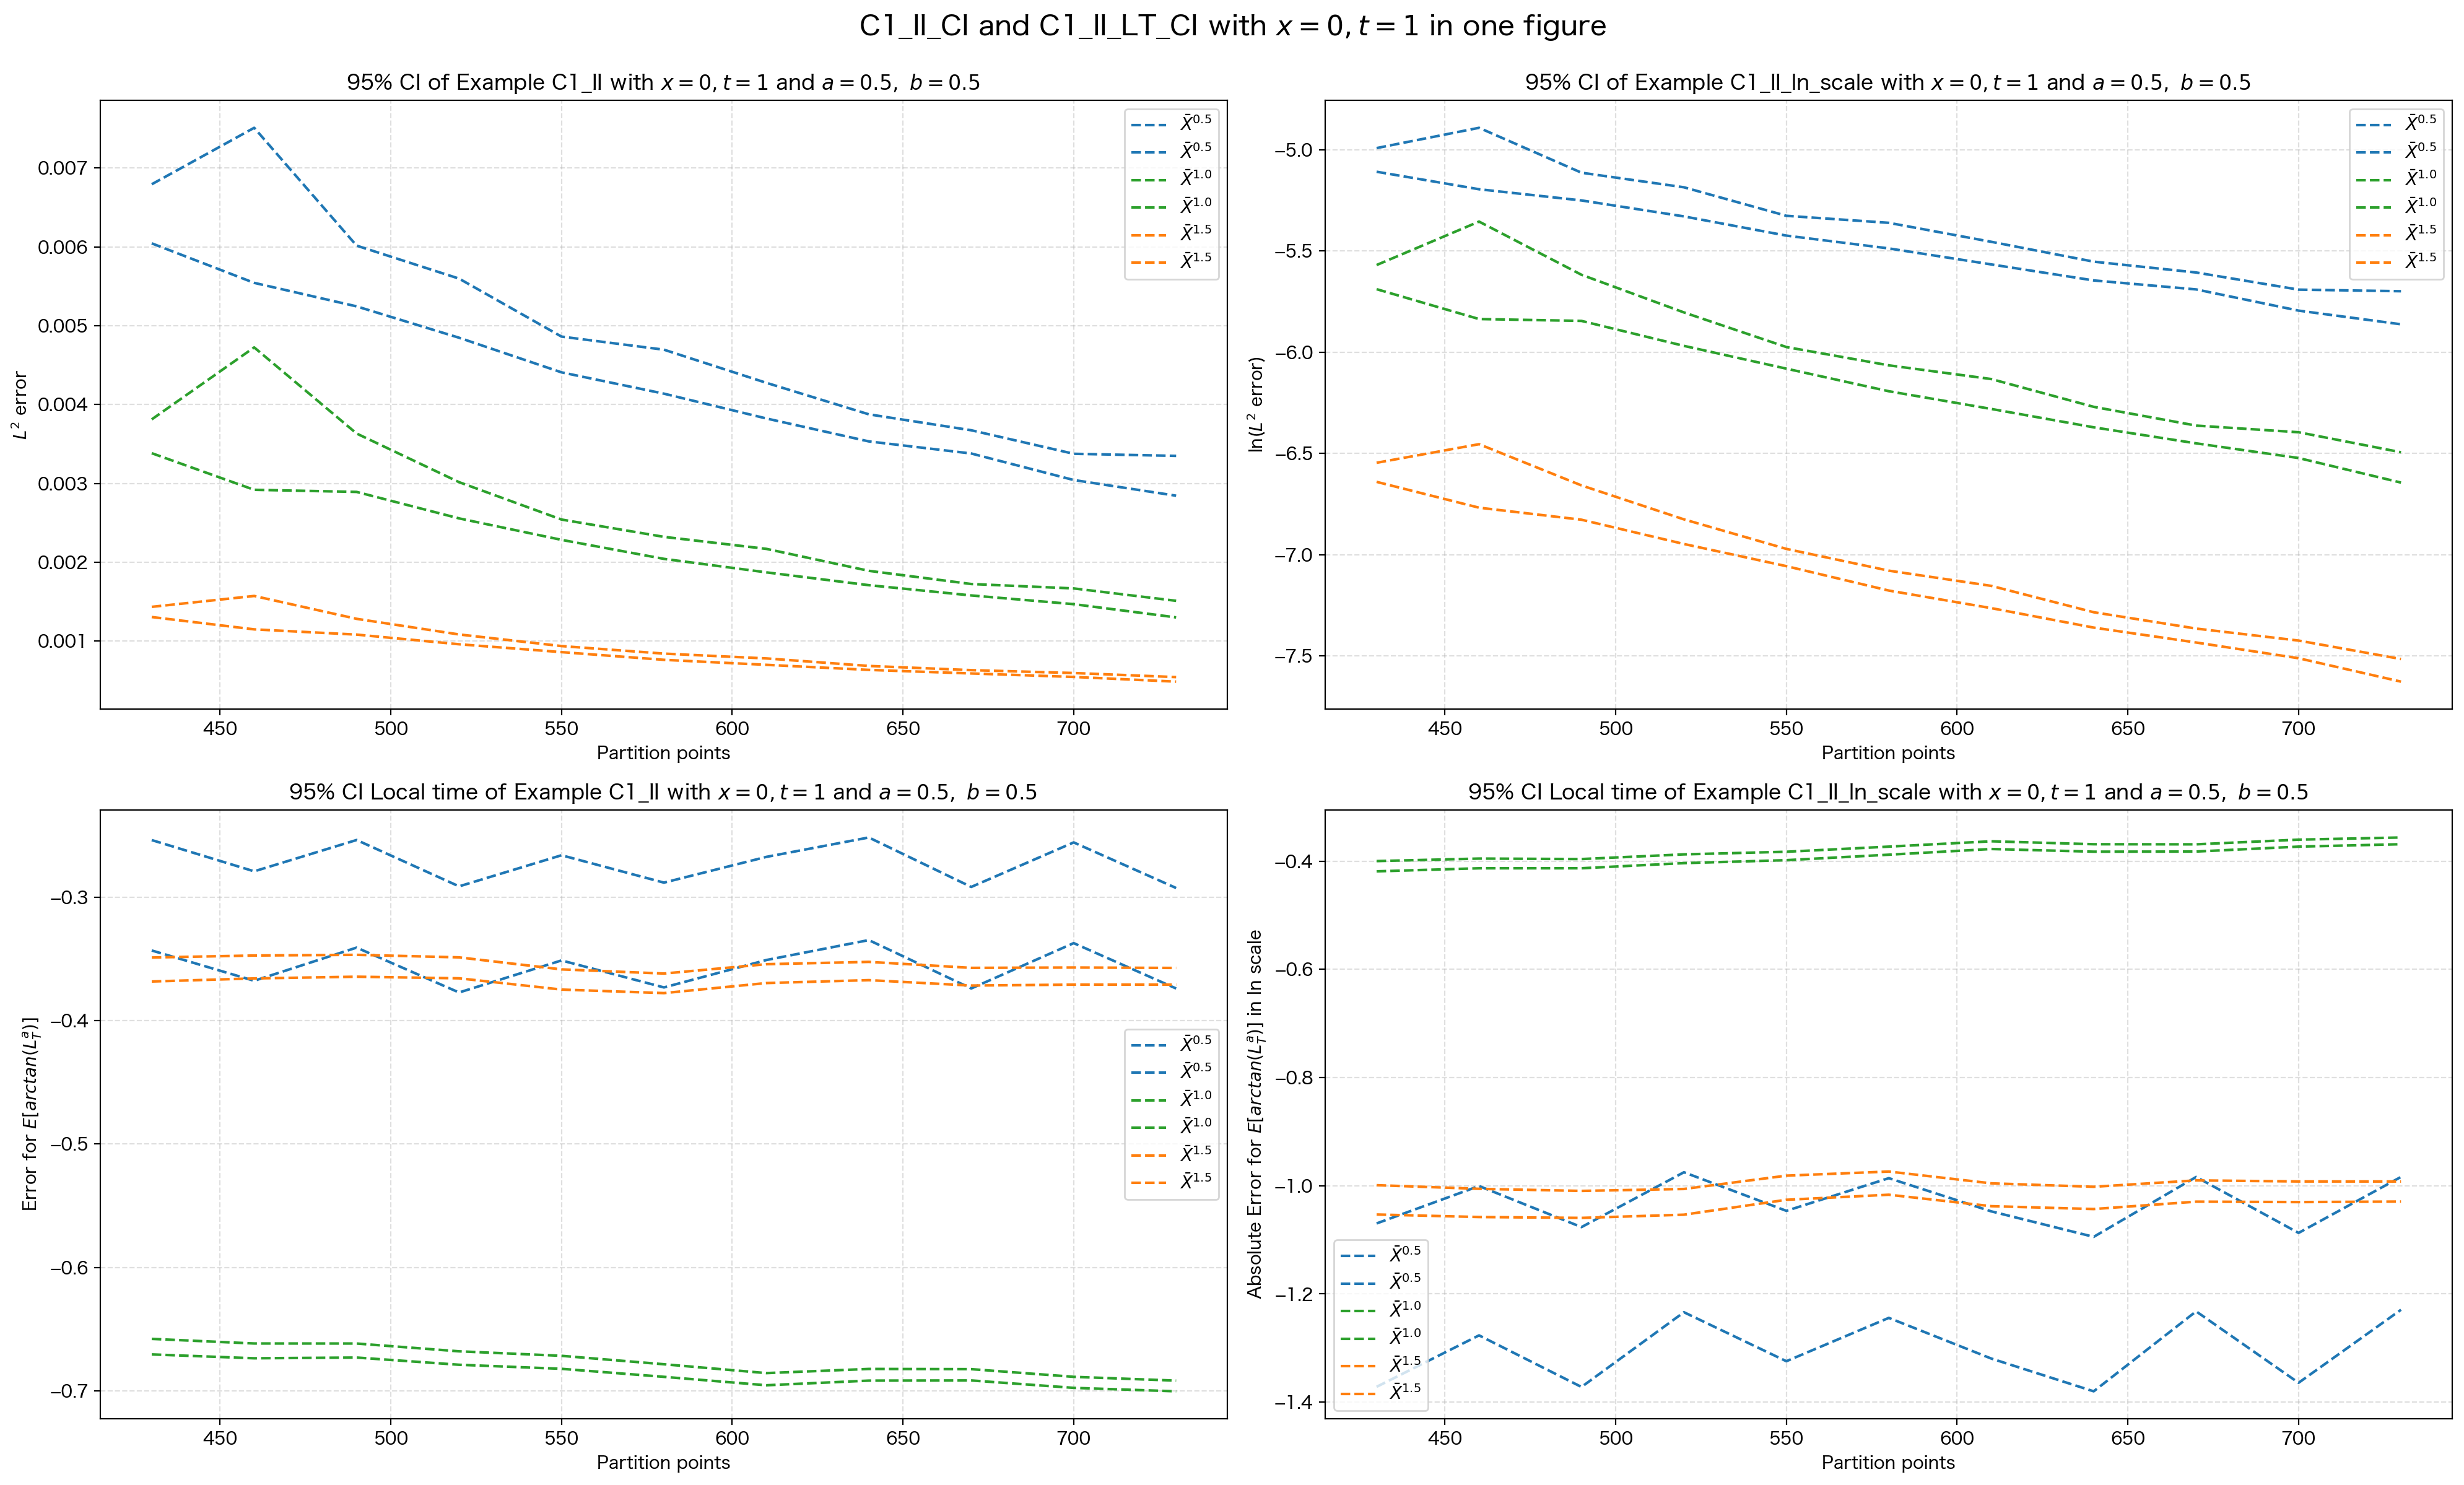

In [20]:
#C1_II_CI, C1_II_CI_ln and C1_II_LT_CI, C1_II_LT_CI_ln with \bar{X}(x,t,w,w') in one figure
# 4つのsubplotsを作成す
fig, axes = plt.subplots(2, 2, figsize=(20, 12), dpi=200) #2row, 2columns
ax5,ax6,ax7,ax8 = axes.flatten()  # 将2D数组展平为1D数组

# 左側のsubplot：3 本の曲線を比較する
ax5.plot(df3["points"], A_up_df3, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax5.plot(df3["points"], A_low_df3, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")  
ax5.plot(df3["points"], Am_up_df3, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax5.plot(df3["points"], Am_low_df3, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")  
ax5.plot(df3["points"], A15_up_df3, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax5.plot(df3["points"], A15_low_df3, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")

# 左側subplotのラベル
ax5.set_title(r'95% CI of Example C1_II with $x=0,t=1$ and $a=0.5,\ b=0.5$ ')
ax5.set_xlabel("Partition points")
ax5.set_ylabel("$L^2$ error")
ax5.grid(True, linestyle="--", alpha=0.4)
ax5.legend()

# 右側のsubplot：Am と A_1.5 の具体的な対比
ax6.plot(df4["points"], A_up_df4_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax6.plot(df4["points"], A_low_df4_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax6.plot(df4["points"], Am_up_df4_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax6.plot(df4["points"], Am_low_df4_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax6.plot(df4["points"], A15_up_df4_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax6.plot(df4["points"], A15_low_df4_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax6.set_title(r'95% CI of Example C1_II_ln_scale with $x=0,t=1$ and $a=0.5,\ b=0.5$ ')
ax6.set_xlabel("Partition points")
ax6.set_ylabel("ln($L^2$ error)")
ax6.grid(True, linestyle="--", alpha=0.4)
ax6.legend()

ax7.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax7.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax7.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax7.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax7.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax7.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")

# 左側subplotのラベル
ax7.set_title(r'95% CI Local time of Example C1_II with $x=0,t=1$ and $a=0.5,\ b=0.5$ ')
ax7.set_xlabel("Partition points")
ax7.set_ylabel("Error for $E[arctan(L_T^a)]$")
ax7.grid(True, linestyle="--", alpha=0.4)
ax7.legend()

ax8.plot(df5["points"], A_up_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax8.plot(df5["points"], A_low_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax8.plot(df5["points"], Am_up_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax8.plot(df5["points"], Am_low_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax8.plot(df5["points"], A15_up_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax8.plot(df5["points"], A15_low_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")

# 左側subplotのラベル
ax8.set_title(r'95% CI Local time of Example C1_II_ln_scale with $x=0,t=1$ and $a=0.5,\ b=0.5$ ')
ax8.set_xlabel("Partition points")
ax8.set_ylabel(r"Absolute Error for $E[arctan(L_T^a)]$ in ln scale")
ax8.grid(True, linestyle="--", alpha=0.4)
ax8.legend()

# 4) 全体レイアウトを調整する
fig.suptitle(r'C1_II_CI and C1_II_LT_CI with $x=0,t=1$ in one figure', fontsize=16, y=0.995)
plt.tight_layout()
plt.savefig("C1_II_one_figure.png")# 画像として保存したい場合はコメントアウトを外す
plt.show()

<>:52: SyntaxWarning: invalid escape sequence '\ '
<>:52: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_16591/1077097784.py:52: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


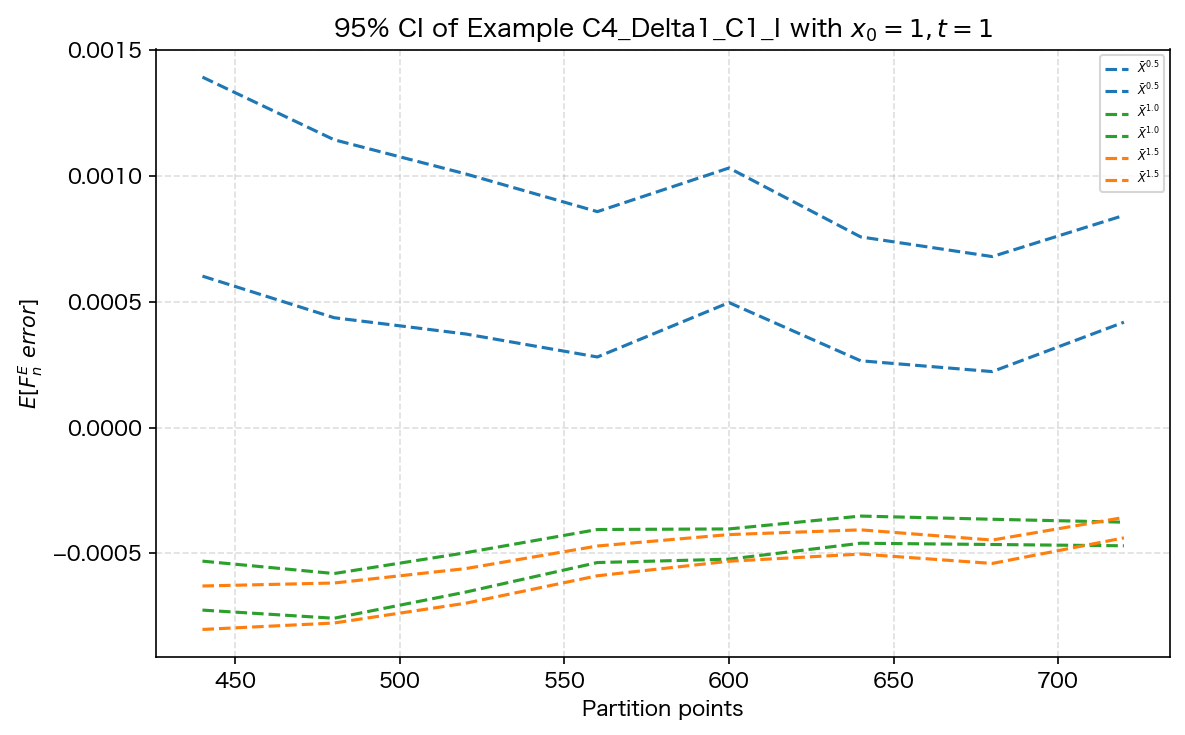

In [ ]:
#C1_II_LT_CI with \bar{X}(x,t,w,w')
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("c4_delta1_c1_i_ci_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 4 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C4_Delta1_C1_I_CI with $x_0=1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta1_C1_I_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








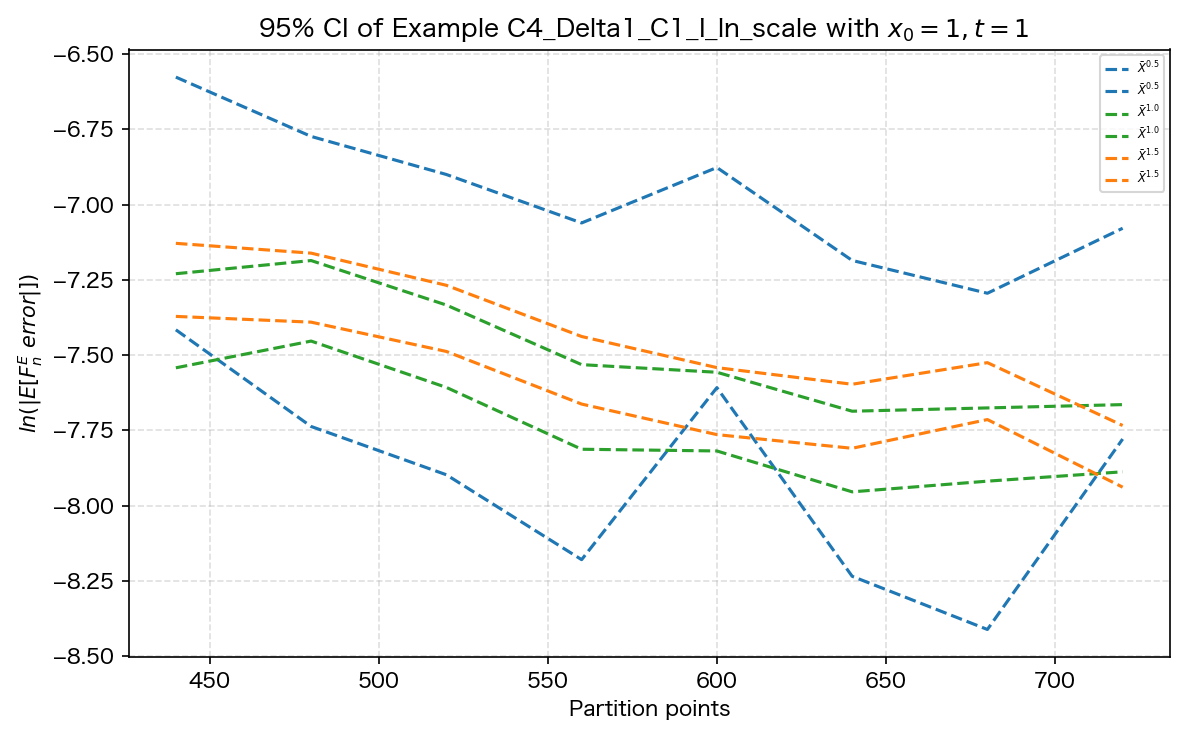

In [ ]:
#C1_II_LT_CI with \bar{X}(x,t,w,w') in Log scale
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("c4_delta1_c1_i_ci_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 4 * df5['points'] ** 2
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5



#log変換
A_up_df5_log  = np.log(abs(A_up_df5))
A_low_df5_log = np.log(abs(A_low_df5))
Am_up_df5_log = np.log(abs(Am_up_df5))
Am_low_df5_log = np.log(abs(Am_low_df5))
A15_up_df5_log = np.log(abs(A15_up_df5))
A15_low_df5_log = np.log(abs(A15_low_df5))


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$" )  
plt.plot(df5["points"], Am_up_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$" )  
plt.plot(df5["points"], A15_up_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$" )
plt.title(r'95% CI of Example C4_Delta1_C1_I_CI_ln_scale with $x_0=1,t=1$  ')
plt.xlabel("Partition points")
plt.ylabel(r"$ln(|E[F_n^{E}\ error|])$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta1_C1_I_CI_ln.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








<>:52: SyntaxWarning: invalid escape sequence '\ '
<>:52: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_16591/156589701.py:52: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{M}\ error]$")


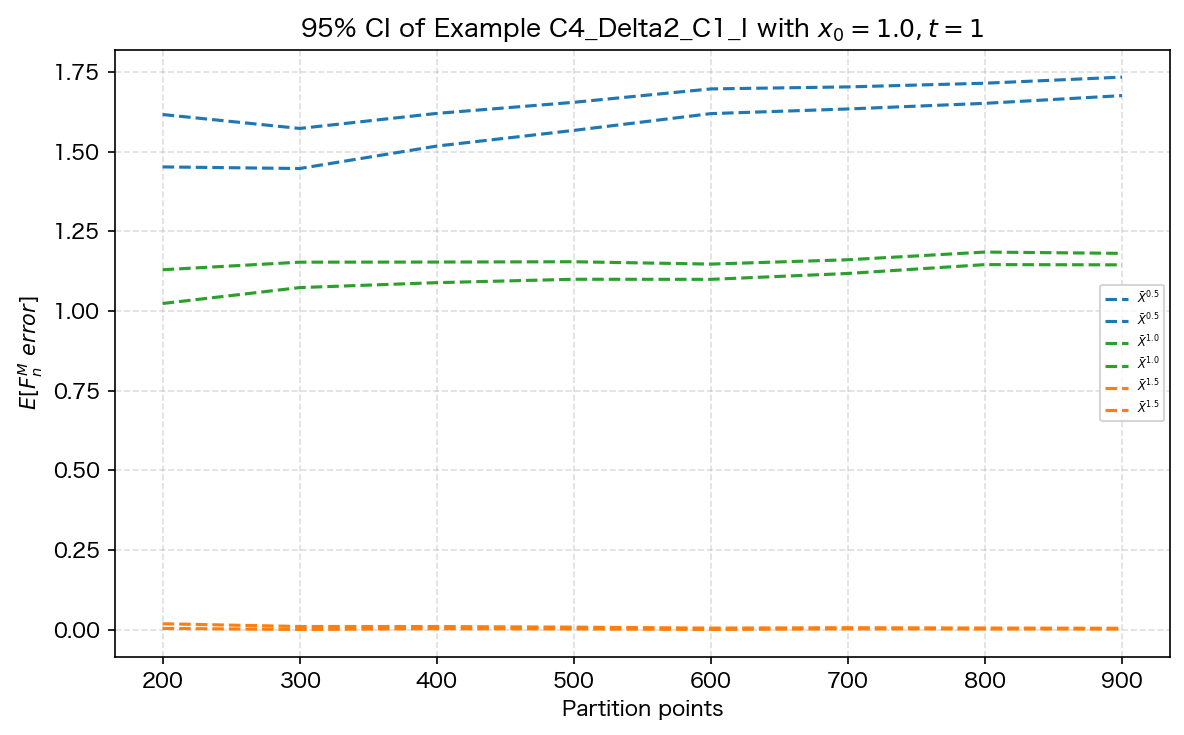

In [35]:

#C4_Delta2_C1_I_CI with \bar{X}(x,t,w)
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("c4_delta2_c1_i_ci_ver1_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C4_Delta2_C1_I with $x_0=1.0,t=1$')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{M}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta1_C1_I_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








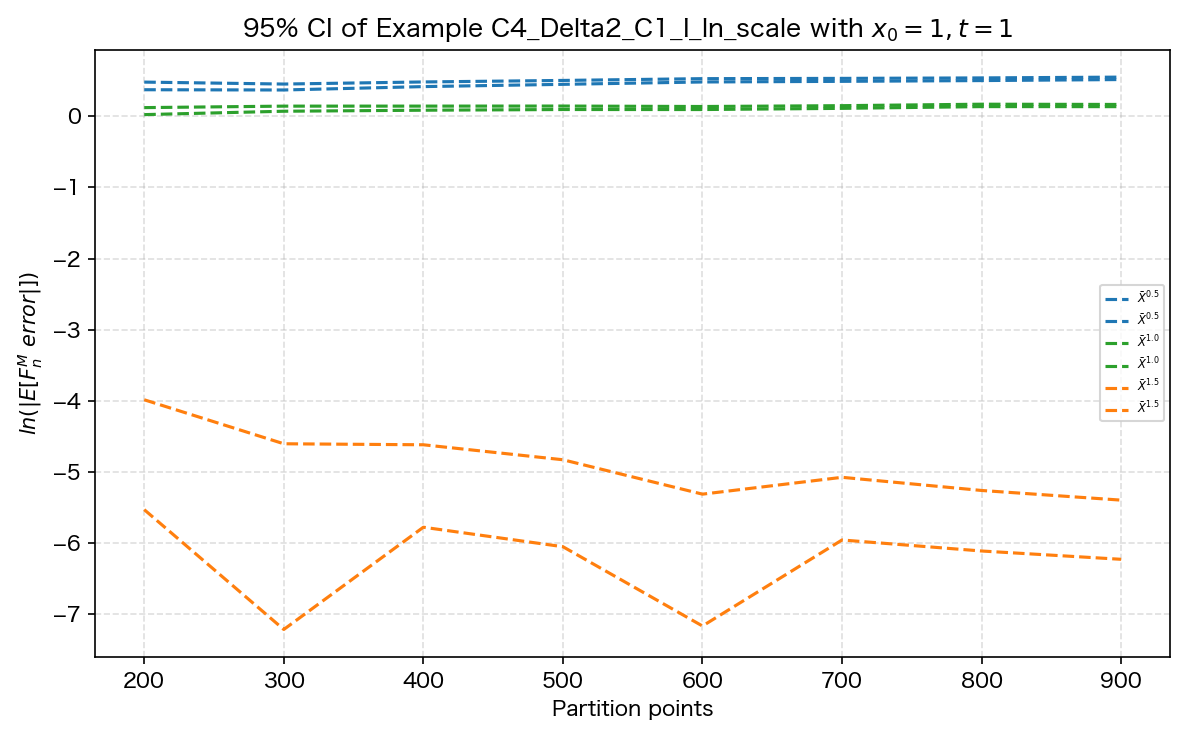

In [36]:
#C4_Delta2_C1_I_CI with \bar{X}(x,t,w) in Log scale
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("c4_delta2_c1_i_ci_ver1_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = df5['points'] ** 2
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5



#log変換
A_up_df5_log  = np.log(abs(A_up_df5))
A_low_df5_log = np.log(abs(A_low_df5))
Am_up_df5_log = np.log(abs(Am_up_df5))
Am_low_df5_log = np.log(abs(Am_low_df5))
A15_up_df5_log = np.log(abs(A15_up_df5))
A15_low_df5_log = np.log(abs(A15_low_df5))


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$" )  
plt.plot(df5["points"], Am_up_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$" )  
plt.plot(df5["points"], A15_up_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$" )
plt.title(r'95% CI of Example C4_Delta2_C1_I_ln_scale with $x_0=1,t=1$  ')
plt.xlabel("Partition points")
plt.ylabel(r"$ln(|E[F_n^{M}\ error|])$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta2_C1_I_CI_ln.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








<>:52: SyntaxWarning: invalid escape sequence '\ '
<>:52: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_50751/3656456033.py:52: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


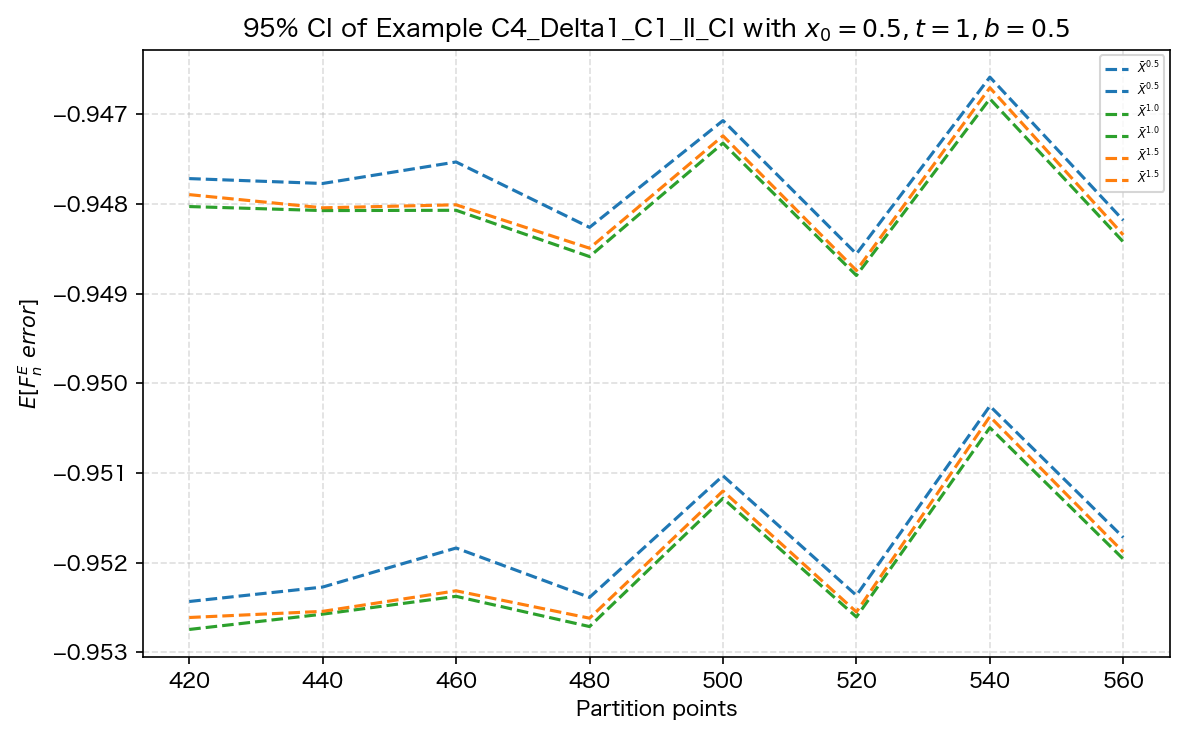

In [4]:
#C4_Delta1_C1_II_CI 
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C4_Delta1_C1_II_CI.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 4 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C4_Delta1_C1_II_CI with $x_0=0.5,t=1,b=0.5$')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta1_C1_I_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








<>:52: SyntaxWarning: invalid escape sequence '\ '
<>:52: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_61464/786865611.py:52: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


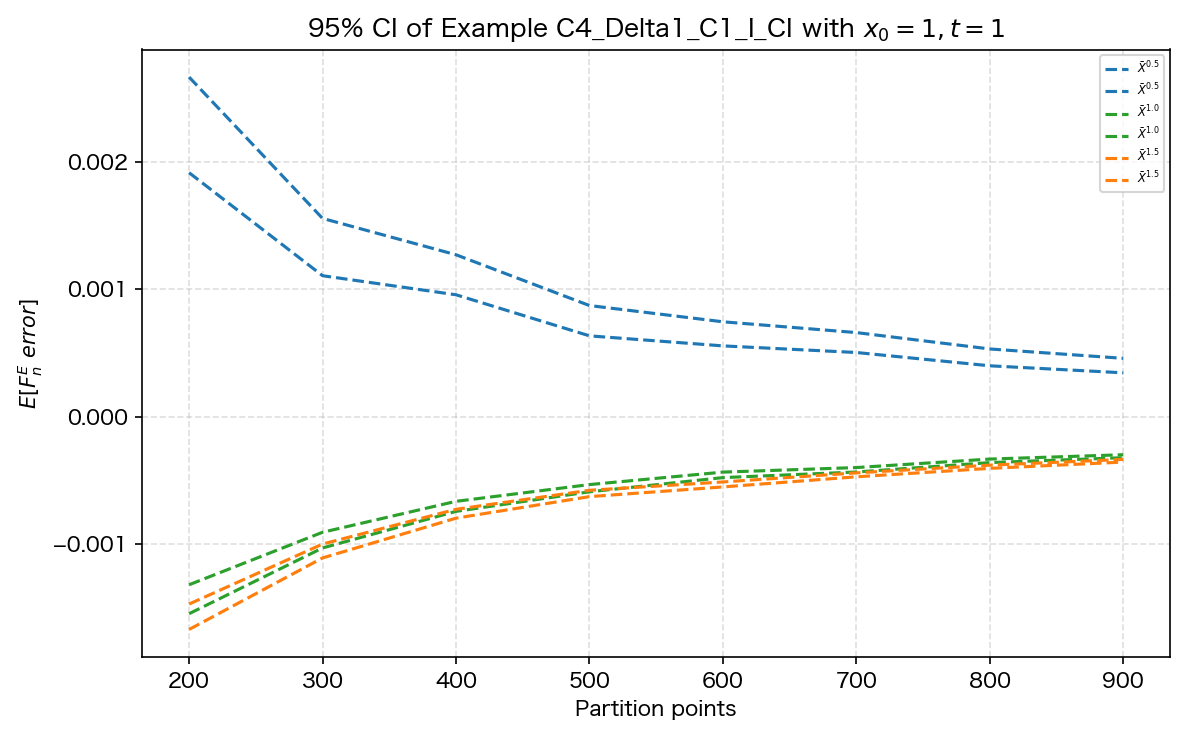

In [6]:
#C4_Delta1_C1_II_CI 
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C4_Delta1_C1_I_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 32 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C4_Delta1_C1_I_CI with $x_0=1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta1_C1_I_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








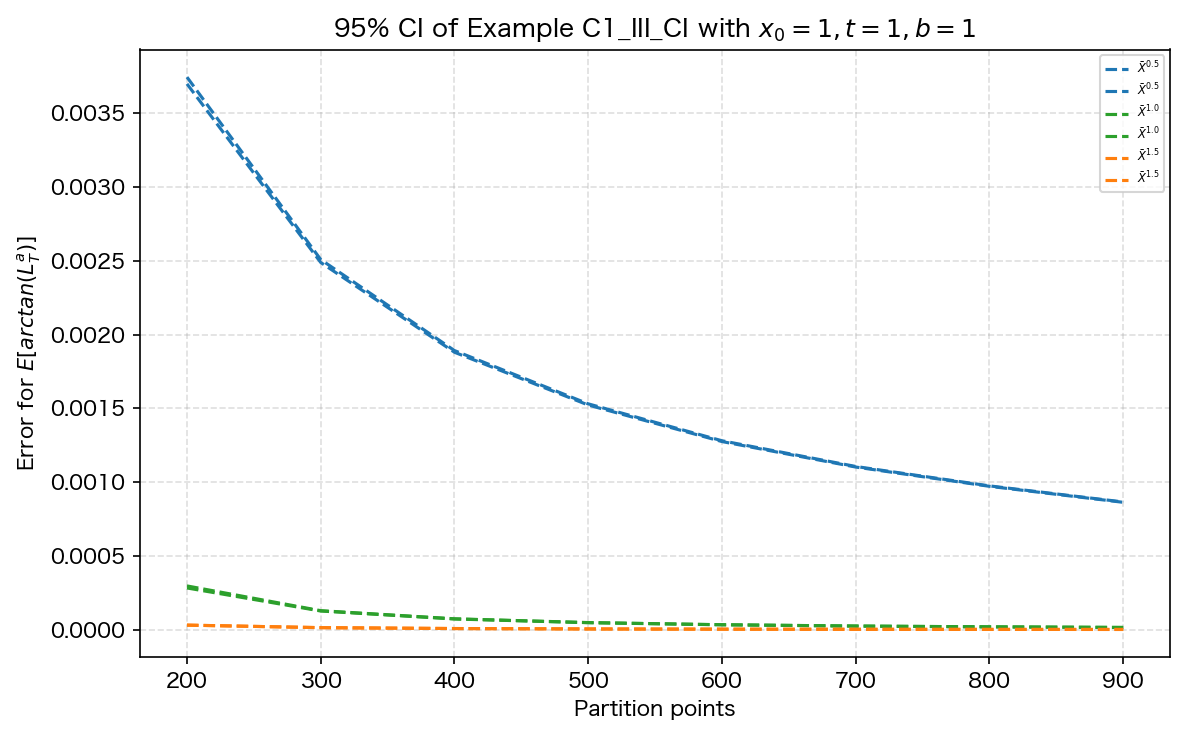

In [29]:
#C1_III_CI 
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_III_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 16 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C1_III_CI with $x_0=1,t=1,b=1$')
plt.xlabel("Partition points")
plt.ylabel("Error for $E[arctan(L_T^a)]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_III_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








In [ ]:
#C4_Delta1_C1_III_CI
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C4_Delta1_C1_III_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C4_Delta1_C1_III_CI with $x_0=1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta1_C1_III_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








In [ ]:
#C4_Delta2_C1_III_CI
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C4_Delta2_C1_III_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C4_Delta2_C1_III_CI with $x_0=1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{M}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta2_C1_III_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()








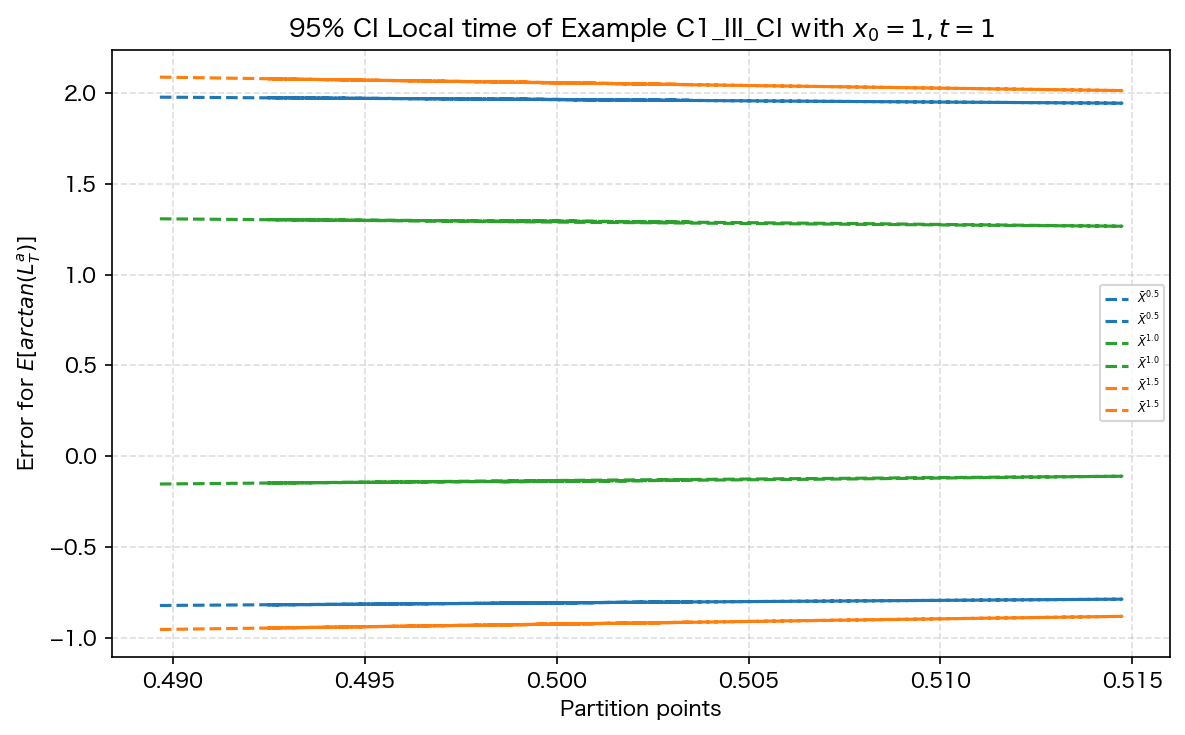

In [13]:
#C1_III_TL_CI
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_III_TL_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 16 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI Local time of Example C1_III_CI with $x_0=1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("Error for $E[arctan(L_T^a)]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_III_TL_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()







<>:52: SyntaxWarning: invalid escape sequence '\ '
<>:52: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_61464/653982880.py:52: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


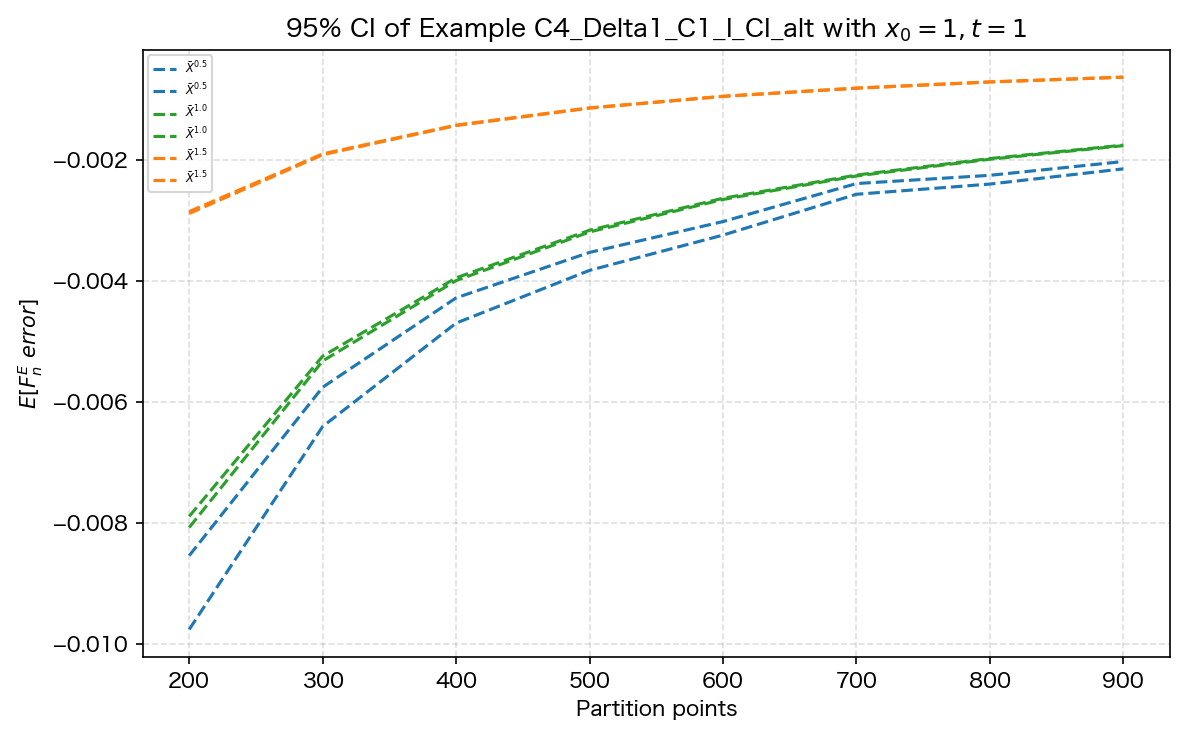

In [11]:
#C4_Delta1_C1_I_CI_test
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C4_Delta1_C1_I_CI_alt_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C4_Delta1_C1_I_CI_alt with $x_0=1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C4_Delta1_C1_I_CI_test.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

<>:57: SyntaxWarning: invalid escape sequence '\ '
<>:57: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_61464/657895957.py:57: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


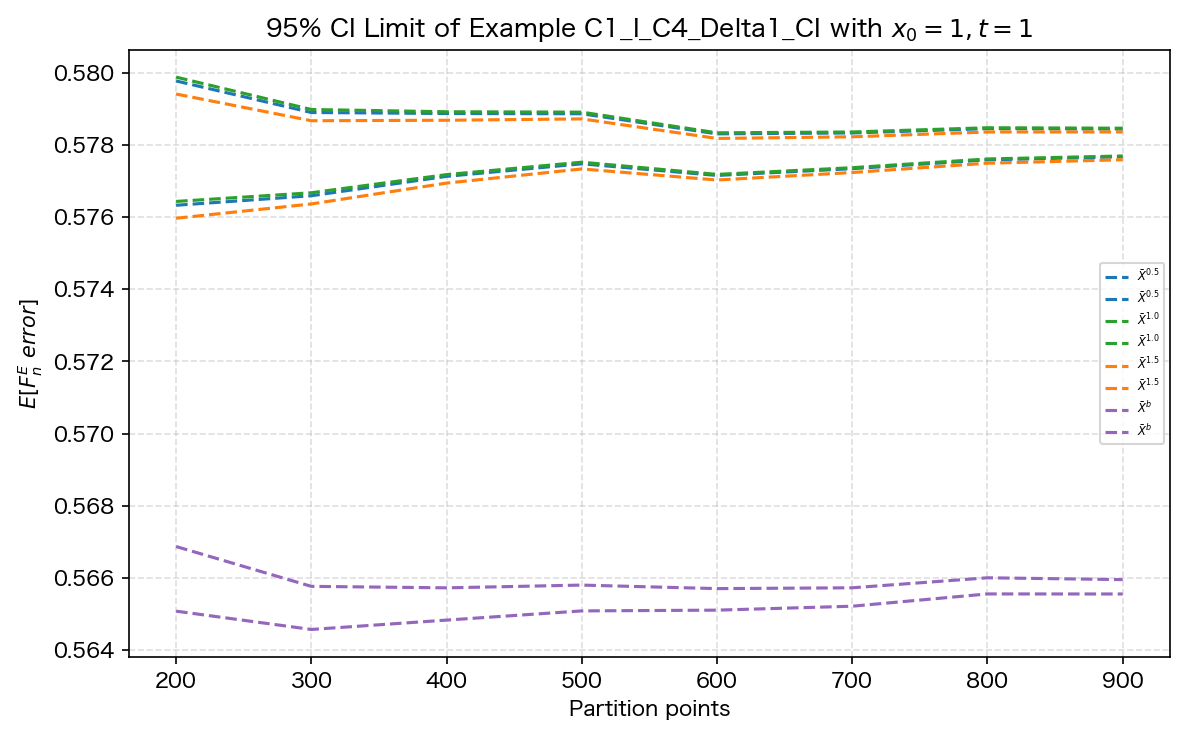

In [21]:
#C1_I_C4_Delta1_CI_test
#53ページのデータの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_I_CI_C4_Delta1_test_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)
Ab = np.sqrt(df5['Eb']) #A_bの標本標準偏差(SD)

paths = 16 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)
Ab_se_df5   = Ab / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5
Ab_up_df5    = df5['Ab']     + z * Ab_se_df5
Ab_low_df5   = df5['Ab']     - z * Ab_se_df5

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], Ab_up_df5, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
plt.plot(df5["points"], Ab_low_df5, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
plt.title(r'95% CI Limit of Example C1_I_C4_Delta1_CI with $x_0=1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_C4_Delta1_CI_limit.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()







<>:57: SyntaxWarning: invalid escape sequence '\ '
<>:57: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_61464/2723754276.py:57: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


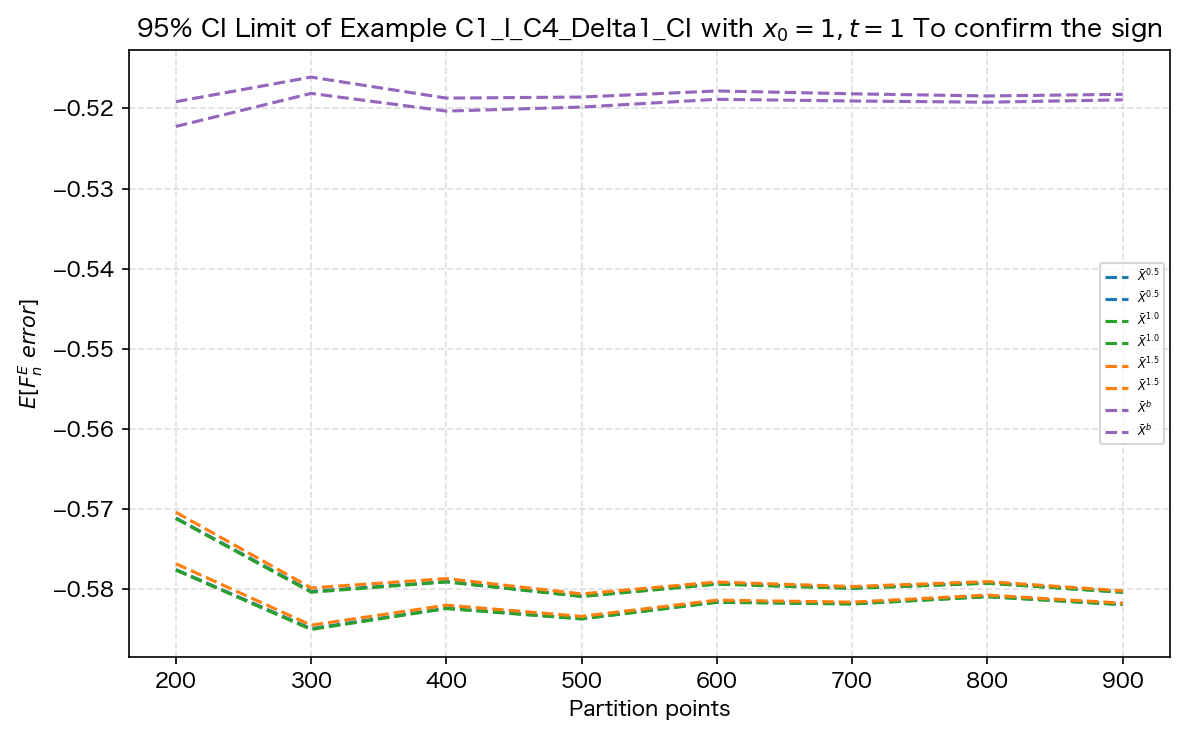

In [28]:
#C1_I_C4_Delta1_CI_limit_alt
#データの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_I_CI_C4_Delta1_limit_alt_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)
Ab = np.sqrt(df5['Eb']) #A_bの標本標準偏差(SD)

paths = 16 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)
Ab_se_df5   = Ab / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5
Ab_up_df5    = df5['Ab']     + z * Ab_se_df5
Ab_low_df5   = df5['Ab']     - z * Ab_se_df5

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], Ab_up_df5, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
plt.plot(df5["points"], Ab_low_df5, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
plt.title(r'95% CI Limit of Example C1_I_C4_Delta1_CI with $x_0=1,t=1$ To confirm the sign')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_C4_Delta1_CI_limit_alt.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

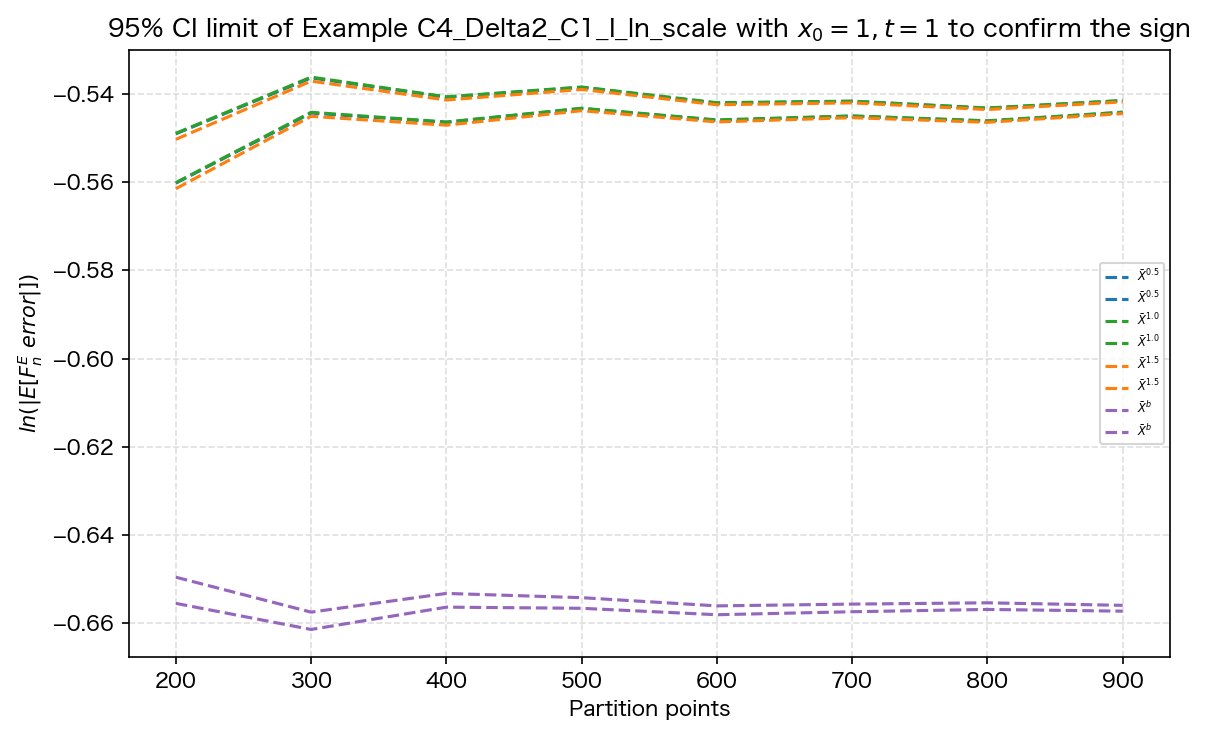

In [26]:
#C1_I_C4_Delta1_CI_limit_alt_log 
#データの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_I_CI_C4_Delta1_limit_alt_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)
Ab = np.sqrt(df5['Eb']) #A_bの標本標準偏差(SD)

paths = 16 * df5['points'] ** 2
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)
Ab_se_df5   = Ab / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5
Ab_up_df5    = df5['Ab']    + z * Ab_se_df5
Ab_low_df5   = df5['Ab']    - z * Ab_se_df5



#log変換
A_up_df5_log  = np.log(abs(A_up_df5))
A_low_df5_log = np.log(abs(A_low_df5))
Am_up_df5_log = np.log(abs(Am_up_df5))
Am_low_df5_log = np.log(abs(Am_low_df5))
A15_up_df5_log = np.log(abs(A15_up_df5))
A15_low_df5_log = np.log(abs(A15_low_df5))
Ab_up_df5_log = np.log(abs(Ab_up_df5))
Ab_low_df5_log = np.log(abs(Ab_low_df5))


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$" )  
plt.plot(df5["points"], Am_up_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$" )  
plt.plot(df5["points"], A15_up_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$" )
plt.plot(df5["points"], Ab_up_df5_log, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
plt.plot(df5["points"], Ab_low_df5_log, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$" )
plt.title(r'95% CI limit of Example C4_Delta2_C1_I_ln_scale with $x_0=1,t=1$ to confirm the sign')
plt.xlabel("Partition points")
plt.ylabel(r"$ln(|E[F_n^{E}\ error|])$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_CI_C4_Delta1_limit_alt_ln.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

<>:53: SyntaxWarning: invalid escape sequence '\ '
<>:53: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_61464/4141122724.py:53: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


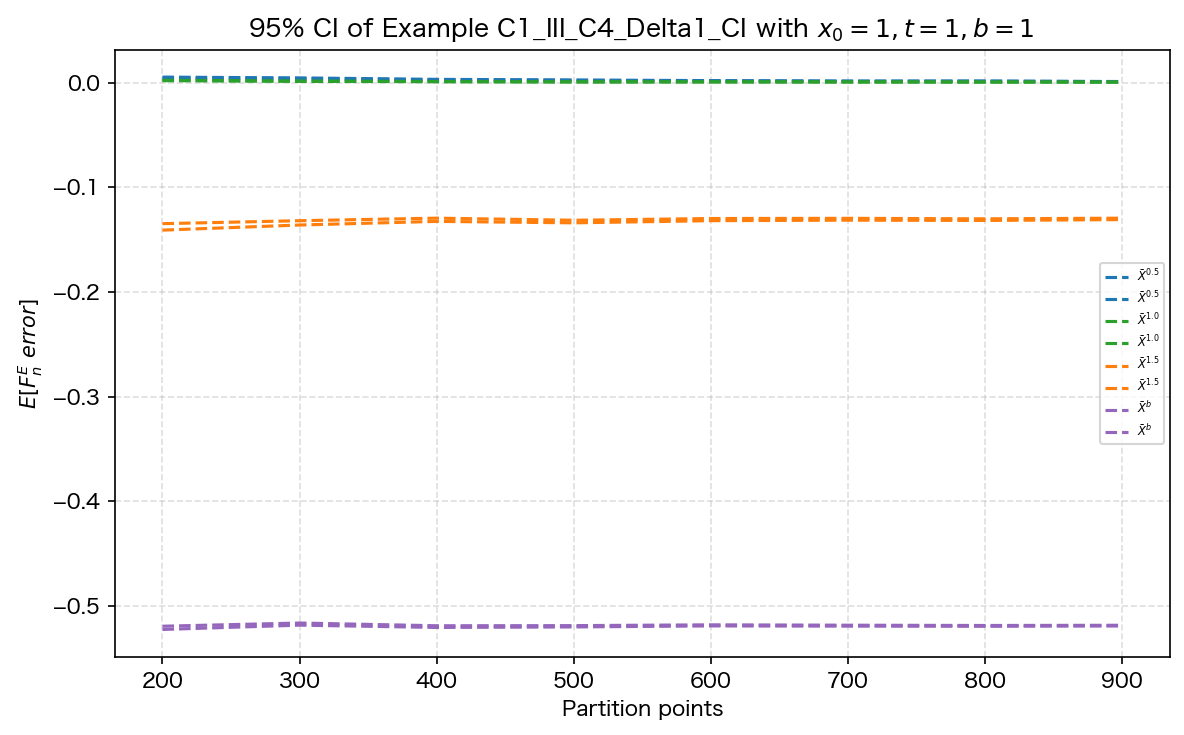

In [32]:
#C1_III_C4_Delta1_CI
#データの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_III_C4_Delta1_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 16 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], Ab_up_df5, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
plt.plot(df5["points"], Ab_low_df5, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
plt.title(r'95% CI of Example C1_III_C4_Delta1_CI with $x_0=1,t=1,b=1 $ ')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_III_C4_Delta1_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

<>:53: SyntaxWarning: invalid escape sequence '\ '
<>:53: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_61464/1872035817.py:53: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


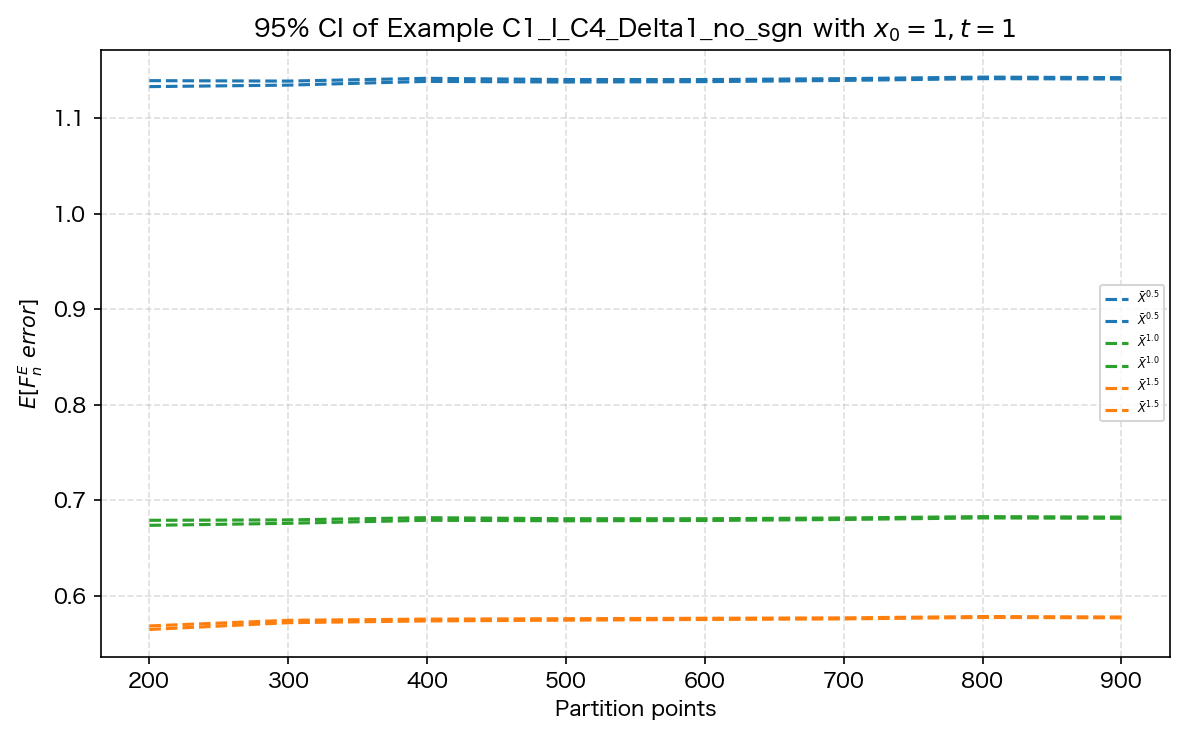

In [52]:
#C1_I_C4_Delta1_bar_f_CI
#TFD1M1
#データの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_I_C4_Delta1_bar_f_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 16 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5



# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'Example TFD1M1_no_sgn with $x_0=1,t=1,a=1,b=1$ ')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
#plt.ylim(-0.27,-0.255)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_C4_Delta1_bar_f_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

In [ ]:
#C1_I_C4_Delta1_CI
#データの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_I_C4_Delta1_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 16 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5



# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'95% CI of Example C1_I_C4_Delta1_no_sgn with $x_0=1,t=1$ ')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
#plt.ylim(-0.27,-0.255)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_C4_Delta1_bar_f_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

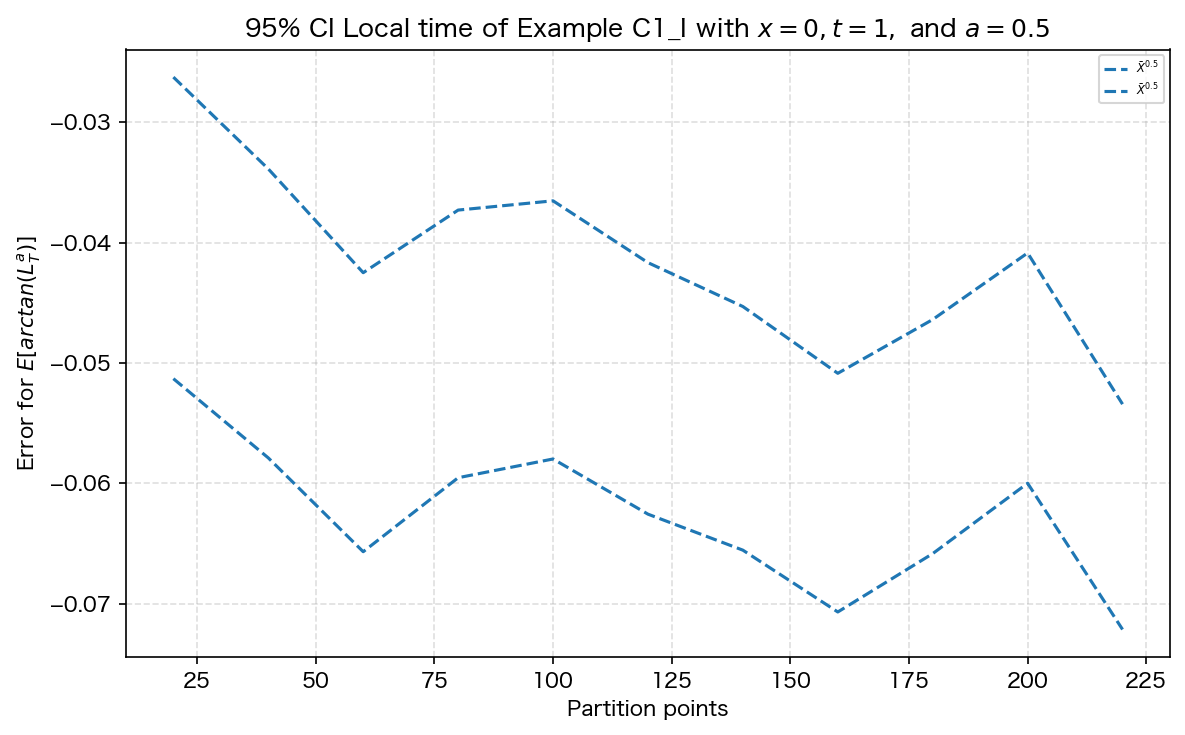

In [55]:
#C1_I_LT_CI with \bar{X}(x,t,w_t)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("C1_I_LT_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 40 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ ")  
# plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
# plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")  
# plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
# plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.title(r'95% CI Local time of Example C1_I with $x=0,t=1,$ and $a=0.5$ ')
plt.xlabel("Partition points")
plt.ylabel("Error for $E[arctan(L_T^a)]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_LT_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

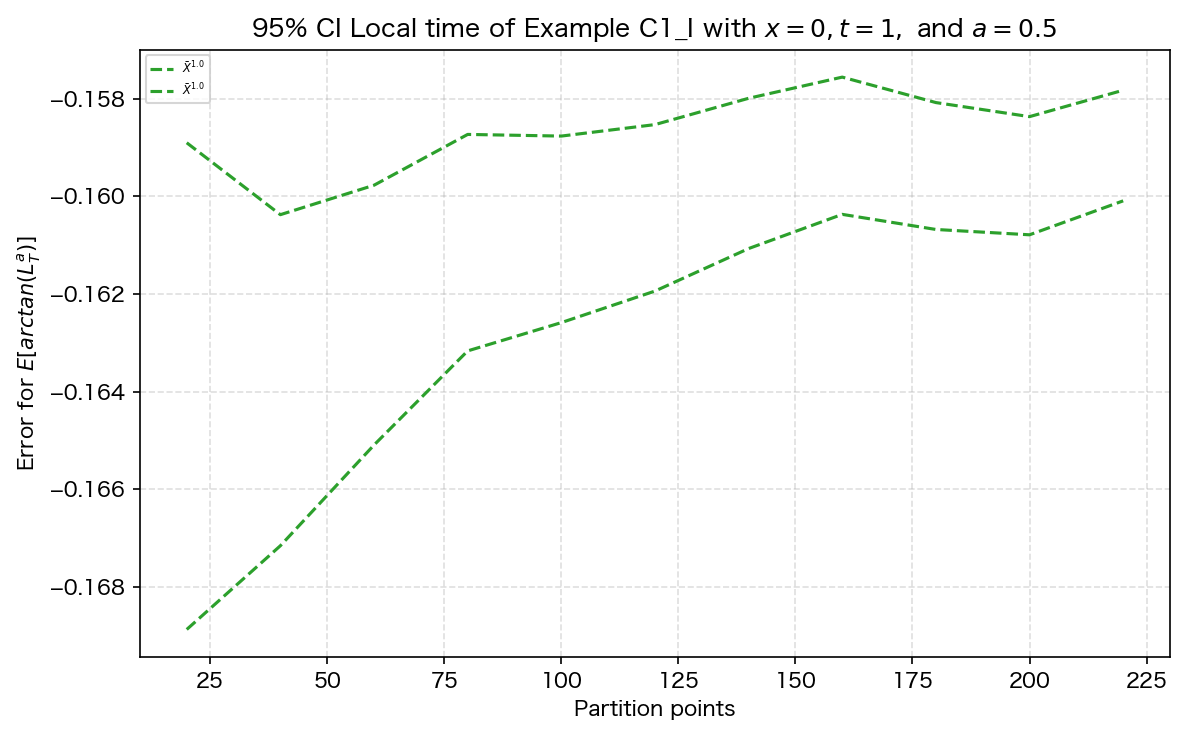

In [56]:
#C1_I_LT_CI with \bar{X}(x,t,w_t)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("C1_I_LT_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 40 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
# plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
# plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ ")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")  
# plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
# plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.title(r'95% CI Local time of Example C1_I with $x=0,t=1,$ and $a=0.5$ ')
plt.xlabel("Partition points")
plt.ylabel("Error for $E[arctan(L_T^a)]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("C1_I_LT_CI.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

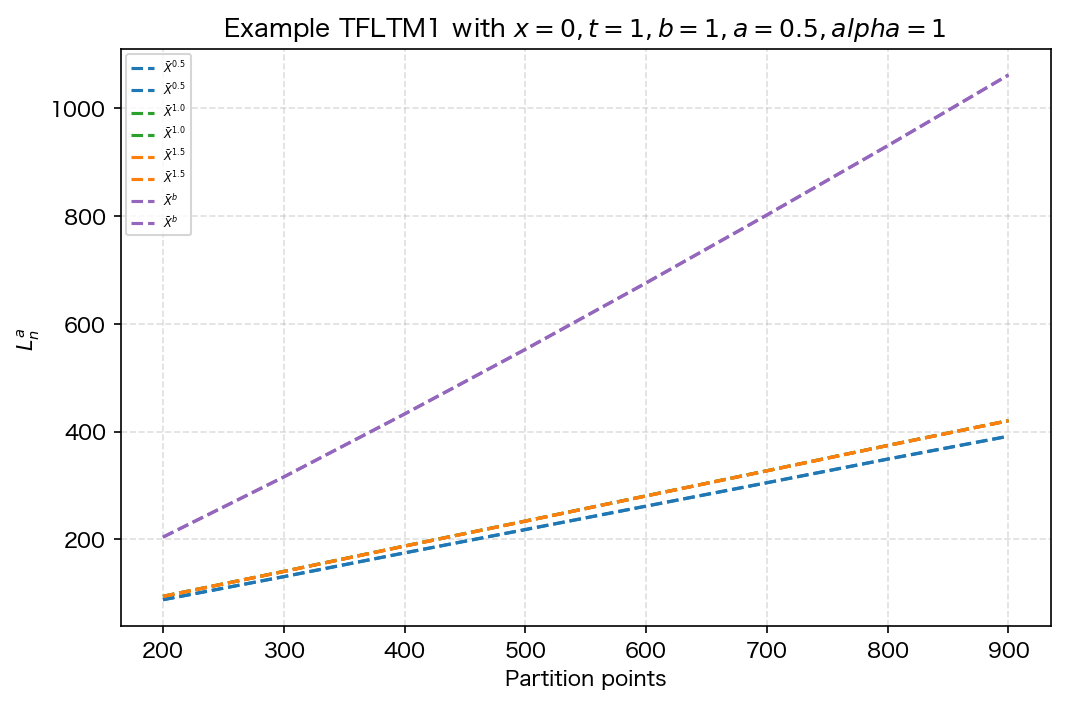

In [80]:
#C1_I_LT_CI with \bar{X}(x,t,w_t)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("TFTVD1_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
Axb_std_df2=np.sqrt(df2['Eb']) #A_bの標本標準偏差(SD)

paths = 16 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
Axb_up_df2   = df2['Ab']   + z * Axb_se_df2
Axb_low_df2  = df2['Ab']   - z * Axb_se_df2

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ ")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], Axb_up_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$ ")
plt.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$ ")  


plt.title(r'Example TFLTM1 with $x=0,t=1,b=1,a=0.5,alpha=1$ ')
plt.xlabel("Partition points")
plt.ylabel("$L^{a}_n$ ")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
#plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("TFLTM1.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()

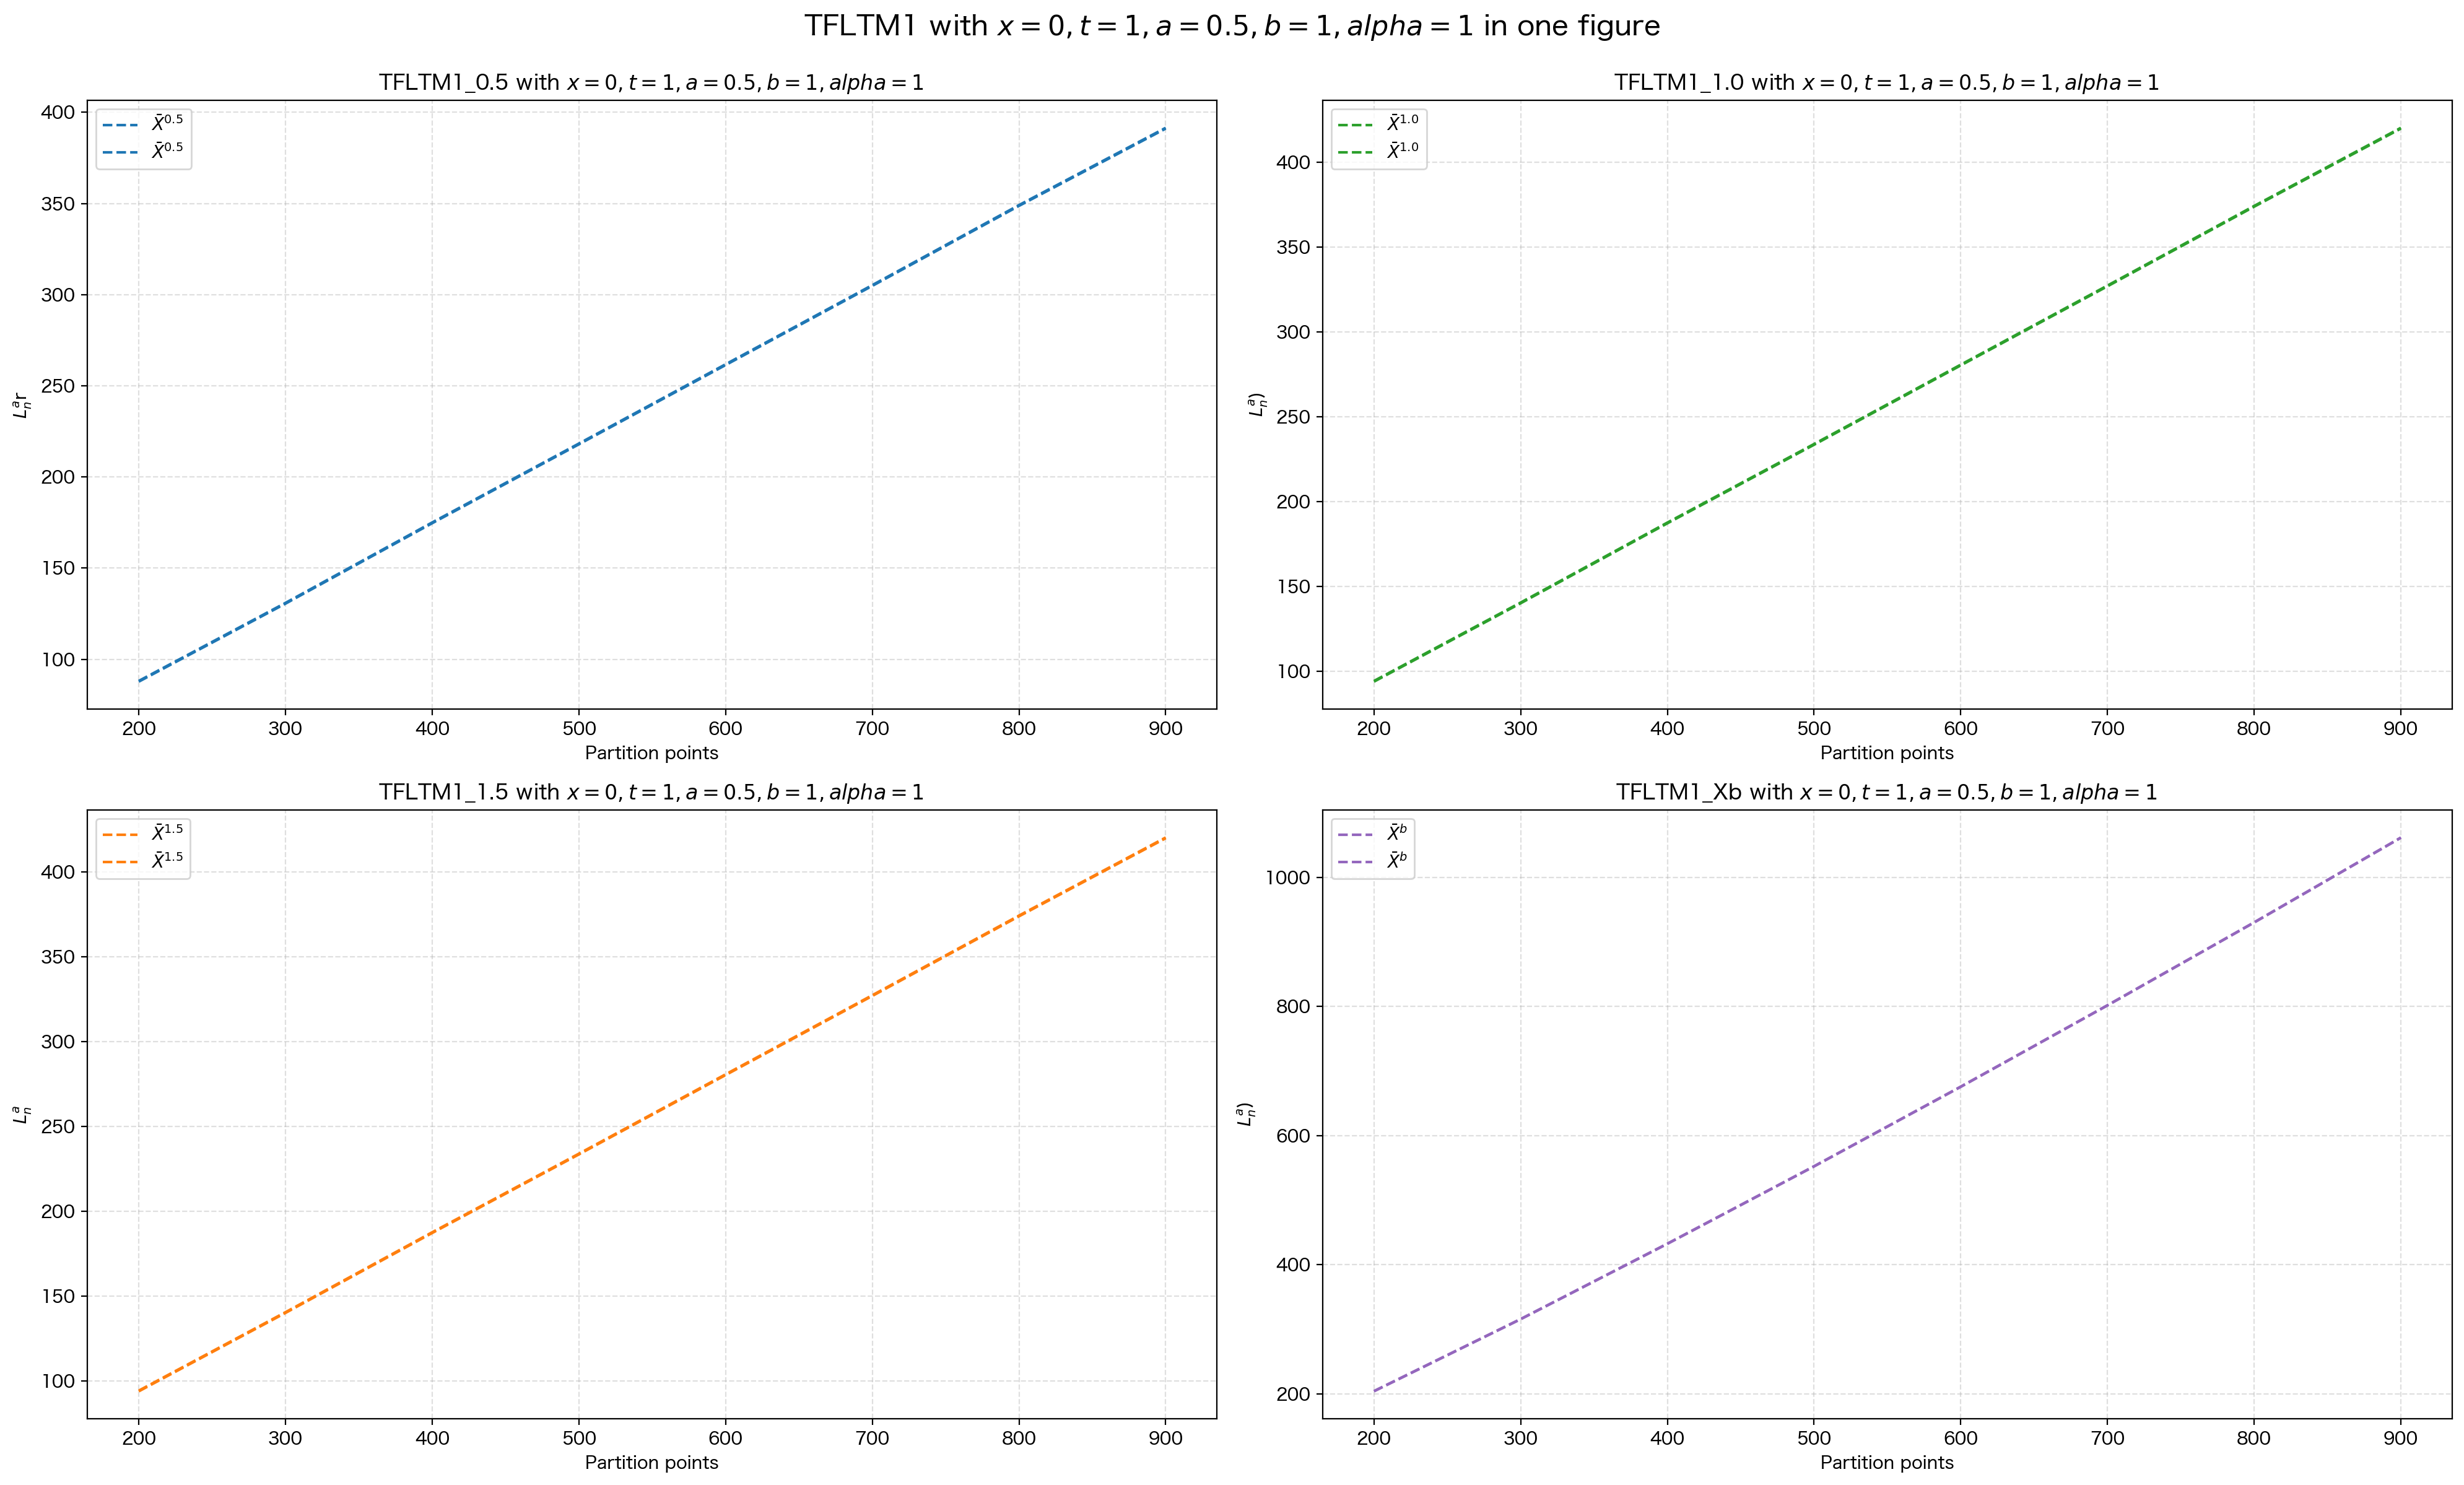

In [76]:
#C1_I_LT_CI_data
#C1_I_LT_CI with \bar{X}(x,t,w_t) in Log scale
##信頼区間公式 \\bar{X} ± z * (s/√n) 
df = pd.read_csv("TFTVD1_data.csv")

fig, axes = plt.subplots(2, 2, figsize=(20, 12), dpi=200) #2row, 2columns
ax1, ax2, ax3, ax4 = axes.flatten()  # 将2D数组展平为1D数组

# 左側のsubplot：3 本の曲線を比較する
ax1.plot(df["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df["points"], A_low_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ ")  


# 左側subplotのラベル
ax1.set_title(r'TFLTM1_0.5 with $x=0,t=1,a=0.5,b=1,alpha=1$ ')
ax1.set_xlabel("Partition points")
ax1.set_ylabel("$L^{a}_n$r")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend()

# 右側のsubplot：Am と A_1.5 の具体的な対比
ax2.plot(df["points"], Am_up_df2, linestyle="--", color="#2ca02c",label=r"$\bar{X}^{1.0}$")
ax2.plot(df["points"], Am_low_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")  
ax2.set_title(r'TFLTM1_1.0 with $x=0,t=1,a=0.5,b=1,alpha=1$ ')
ax2.set_xlabel("Partition points")
ax2.set_ylabel("$L^{a}_n$)")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend()

ax3.plot(df["points"], A15_up_df2, linestyle="--", color="#ff7f0e",label=r"$\bar{X}^{1.5}$")
ax3.plot(df["points"], A15_low_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")  

# 左側subplotのラベル
ax3.set_title(r'TFLTM1_1.5 with $x=0,t=1,a=0.5,b=1,alpha=1$ ')
ax3.set_xlabel("Partition points")
ax3.set_ylabel("$L^{a}_n$")
ax3.grid(True, linestyle="--", alpha=0.4)
ax3.legend()

ax4.plot(df2["points"], Axb_up_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
ax4.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")


# 左側subplotのラベル
ax4.set_title(r'TFLTM1_Xb with $x=0,t=1,a=0.5,b=1,alpha=1$ ')
ax4.set_xlabel("Partition points")
ax4.set_ylabel("$L^{a}_n$)")
ax4.grid(True, linestyle="--", alpha=0.4)
ax4.legend()

# 4) 全体レイアウトを調整する
fig.suptitle(r'TFLTM1 with $x=0,t=1,a=0.5,b=1,alpha=1$ in one figure', fontsize=16, y=0.995)
plt.tight_layout()
plt.savefig("TFLTM1_one_figure.png")# 画像として保存したい場合はコメントアウトを外す
plt.show()


<>:53: SyntaxWarning: invalid escape sequence '\ '
<>:53: SyntaxWarning: invalid escape sequence '\ '
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_61464/3775427446.py:53: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$E[F_n^{E}\ error]$")


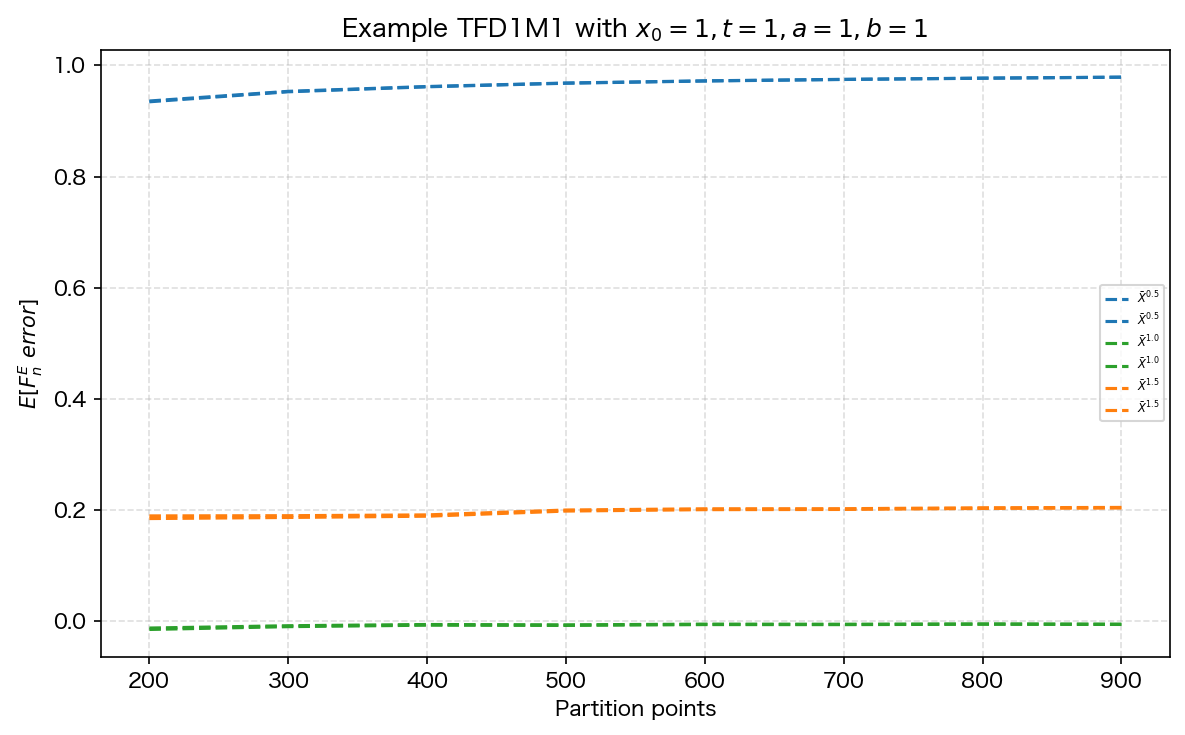

In [79]:
#TFD1M1
#データの95%信頼区間の図 (信頼度変更可能)
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df5 = pd.read_csv("C1_I_C4_Delta1_CI_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df5=np.sqrt(df5['E']) #Aの標本標準偏差(SD)
Am_std_df5=np.sqrt(df5['Em']) #Amの標本標準偏差(SD)
A15_std_df5=np.sqrt(df5['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 16 * (df5['points'] ** 2)
# Standard errors of sample means
A_se_df5    = A_std_df5   / np.sqrt(paths)
Am_se_df5    = Am_std_df5  / np.sqrt(paths)
A15_se_df5   = A15_std_df5 / np.sqrt(paths)

# Confidence bands
A_up_df5     = df5['A']     + z * A_se_df5
A_low_df5   = df5['A']     - z * A_se_df5
Am_up_df5    = df5['Am']    + z * Am_se_df5
Am_low_df5   = df5['Am']    - z * Am_se_df5
A15_up_df5   = df5['A_1_5'] + z * A15_se_df5
A15_low_df5  = df5['A_1_5'] - z * A15_se_df5



# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df5["points"], A_up_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], A_low_df5, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df5["points"], Am_up_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], Am_low_df5, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
plt.plot(df5["points"], A15_up_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.plot(df5["points"], A15_low_df5, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
plt.title(r'Example TFD1M1 with $x_0=1,t=1,a=1,b=1$ ')
plt.xlabel("Partition points")
plt.ylabel("$E[F_n^{E}\ error]$")
#plt.ylim(-0.27,-0.255)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig("TFD1M1.png", dpi=250, bbox_inches='tight') #図の保存
plt.show()